In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [6]:
# get the difference between the first and second date in each country
original_data = pd.read_csv('new_dataset/owid-covid-data-most-recent.csv')
original_data['date'] = pd.to_datetime(original_data['date'])
original_data['dayofweek'] = original_data['date'].dt.dayofweek
original_data = original_data[original_data['dayofweek'] == 6]
weekdf = original_data.groupby('location')
first_date = weekdf['date'].min()
second_date = weekdf.apply(lambda x: x.iloc[1:2])
difference = second_date['date'] - first_date
print(first_date, second_date, difference.sort_values(ascending=True).head(50))
#first_date -second_date['date']
#date_diff = second_date - first_date
#date_diff




location
Afghanistan         2020-01-05
Africa              2020-01-05
Albania             2020-01-05
Algeria             2020-01-05
American Samoa      2020-01-05
                       ...    
Wallis and Futuna   2020-01-05
World               2020-01-05
Yemen               2020-01-05
Zambia              2020-01-05
Zimbabwe            2020-01-05
Name: date, Length: 254, dtype: datetime64[ns]                           iso_code continent           location       date  \
location                                                                     
Afghanistan       1            AFG      Asia        Afghanistan 2020-01-12   
Africa            1357    OWID_AFR       NaN             Africa 2020-01-12   
Albania           2462         ALB    Europe            Albania 2020-01-12   
Algeria           3781         DZA    Africa            Algeria 2020-01-12   
American Samoa    4862         ASM   Oceania     American Samoa 2020-01-12   
...                            ...       ...             

In [7]:
# amanda 
original_data = pd.read_csv('new_dataset/owid-covid-data-most-recent.csv')
original_data['date'] = pd.to_datetime(original_data['date'])
original_data = original_data[original_data['date'] >= '2020-03-01']
original_data['dayofweek'] = original_data['date'].dt.dayofweek
original_data = original_data[original_data['dayofweek'] == 6]

columns_to_drop = ['new_cases_smoothed',
                   'new_cases_smoothed_per_million',
                   'total_deaths',
                   'total_deaths_per_million',
                   'new_deaths_per_million',
                   'new_deaths_smoothed',
                   'new_deaths_smoothed_per_million',
                   'excess_mortality_cumulative',
                   'excess_mortality_cumulative_absolute',
                   'excess_mortality_cumulative_per_million',
                   'icu_patients',
                   'hosp_patients',
                   'weekly_icu_admissions',
                   'weekly_hosp_admissions',
                   'total_tests',
                   'new_tests',
                   'new_tests_smoothed',
                   'new_tests_smoothed_per_thousand',
                   'tests_per_case', #this is the inverse of positive_rate
                   'new_vaccinations_smoothed',
                   'total_vaccinations',
                   'people_vaccinated',
                   'people_fully_vaccinated',
                   'total_boosters',
                   'new_vaccinations_smoothed_per_million',
                   'new_people_vaccinated_smoothed']
original_data = original_data.drop(columns_to_drop,axis=1)

# filtering countries by null values in other columns
null_counts = original_data.groupby('location').agg(lambda x: x.isnull().sum(axis=0))
total_null = null_counts.sum(axis=1)
null_counts['total_null'] = total_null
#filtering top 10 countries 
sorted_countries = null_counts[['total_null']].sort_values(by = 'total_null',ascending=True)
top_df = sorted_countries.iloc[:10]
filtered_countries_list = top_df.index.to_list()
data = original_data[original_data['location'].isin(filtered_countries_list)]
print(data.shape)
total_missing_per_country = total_null
sorted_countries = total_missing_per_country.sort_values(ascending=True)
sorted_countries.head(10)

#weekdf = original_data.groupby('location') 
#first_date = weekdf['date'].min()
#second_date = weekdf.apply(lambda x: x.iloc[1:2])
#difference = second_date['date'] - first_date
#print(first_date, second_date, difference.sort_values(ascending=True).head(50))
#first_date -second_date['date']
#date_diff = second_date - first_date
#date_diff


(2023, 42)


location
Estonia          1126
Italy            1127
Ireland          1301
Israel           1339
Malaysia         1413
Czechia          1448
Belgium          1466
France           1498
United States    1528
Chile            1574
dtype: int64

# The Data

In [8]:
original_data = pd.read_csv('new_dataset/owid-covid-data-most-recent.csv')
data = pd.read_csv('new_dataset/owid-covid-data-most-recent.csv')
data = data.dropna(subset = ['new_deaths'])

# converting date to date object
data['date'] = pd.to_datetime(data['date'])

# dropping observations before COVID-19 was detected in the country
data = data[~data['total_cases'].isna()]

# dropping redundant columns like smoothed and similar predictors
columns_to_drop = ['new_cases_smoothed',
                   'new_cases_smoothed_per_million',
                   'total_deaths',
                   'total_deaths_per_million',
                   'new_deaths_per_million',
                   'new_deaths_smoothed',
                   'new_deaths_smoothed_per_million',
                   'excess_mortality_cumulative',
                   'excess_mortality_cumulative_absolute',
                   'excess_mortality_cumulative_per_million',
                   'icu_patients',
                   'hosp_patients',
                   'weekly_icu_admissions',
                   'weekly_hosp_admissions',
                   'total_tests',
                   'new_tests',
                   'new_tests_smoothed',
                   'new_tests_smoothed_per_thousand',
                   'tests_per_case', #this is the inverse of positive_rate
                   'new_vaccinations_smoothed',
                   'total_vaccinations',
                   'people_vaccinated',
                   'people_fully_vaccinated',
                   'total_boosters',
                   'new_vaccinations_smoothed_per_million',
                   'new_people_vaccinated_smoothed']
data = data.drop(columns_to_drop,axis=1)

# filtering countries by null values in other columns
null_counts = data.groupby('location').agg(lambda x: x.isnull().sum(axis=0))
# missing_counts = data.groupby('location').apply(lambda x: x.isnull().sum())
total_null = null_counts.sum(axis=1)
null_counts['total_null'] = null_counts.sum(axis=1)
#filtering top 10 countries 
sorted_countries = null_counts[['total_null']].sort_values(by = 'total_null',ascending=True)
top_df = sorted_countries.iloc[:10]
filtered_countries_list = top_df.index.to_list()
data = data[data['location'].isin(filtered_countries_list)]
print(data.shape)
total_missing_per_country = total_null
sorted_countries = total_missing_per_country.sort_values(ascending=True)
sorted_countries.head(10)

(2007, 41)


location
United States    1008
Estonia          1104
Italy            1191
Ireland          1285
Israel           1367
Czechia          1408
Malaysia         1465
Belgium          1514
Chile            1559
France           1583
dtype: int64

# Missingness

# filtering data for top 10 countries with least missingness
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result_df = pd.DataFrame()
    for country in data['location'].unique():
        country_data = data[data['location'] == country]
        missing_counts = country_data.isnull().sum()
        total_missing = missing_counts.sum()
        missingness_prop = total_missing / (len(country_data)*data.shape[1])
        result_df = result_df.append({'location': country, 'total_missing': total_missing, 'missingness_prop': missingness_prop}, ignore_index=True)
    
    sorted_countries = result_df.sort_values(by='missingness_prop', ascending=False)
    print(sorted_countries.head(10))

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result_df = pd.DataFrame()
    
    for country in data['location'].unique():
        country_data = data[data['location'] == country]
        missing_counts = country_data.isnull().sum()
        total_missing = missing_counts.sum()
        missingness_prop = total_missing / (len(country_data) * country_data.shape[1])  # Use 'country_data.shape[1]' instead of 'data.shape[1]'
        df_new_row = pd.DataFrame({'location': country, 'total_missing': total_missing, 'missingness_prop': missingness_prop}, index=[0])
        result_df = pd.concat([result_df, df_new_row], ignore_index=True)  # Concatenate to 'result_df' instead of 'country_data'

    sorted_countries = result_df.sort_values(by='missingness_prop', ascending=True)  # Sort in ascending order to get the least missingness
    print(sorted_countries.head(10))


        location  total_missing  missingness_prop
3        Estonia           1104          0.133301
7          Italy           1191          0.141013
9  United States           1008          0.142112
5        Ireland           1285          0.155928
6         Israel           1367          0.163439
2        Czechia           1408          0.170853
8       Malaysia           1465          0.172617
0        Belgium           1514          0.180131
4         France           1583          0.186521
1          Chile           1559          0.189176


In [10]:
# shrinking the original data set based on top 10 countries

top_countries = sorted_countries.head(10)
data_smaller = data[data['location'].isin(top_countries['location'])]

In [11]:
# looking at missingness in the smaller dataset

missing_values = data_smaller.isnull().sum()
missingness_prop = missing_values / len(data_smaller)
column_missingness = missing_values.to_frame(name='total_missing').join(missingness_prop.rename('missingness_prop')).sort_values(by='missingness_prop',ascending=False)

def highlight(val):
    color = 'red' if val > 0.5 else 'default'
    return f'color: {color}'

column_missingness = column_missingness.style.applymap(highlight, subset=['missingness_prop'])
column_missingness

## Missingness Comments
columns with missingness over 0.50, which we have decided warrants a closer look are total_boosters (51% missing), total_boosters_per_hundred (51% missing), and hand_washing_facilities (100% missing). Based on correlation with the target variable, if those columns have low correlation, we will remove them from the data set. 

# Constant Variables

In [12]:
# looking for constant and quasi-constant variables
num_col = data_smaller.select_dtypes(include=['number']).columns
data_num = data_smaller[num_col]
threshold = 0.95
selector = VarianceThreshold(threshold)
selector.fit(data_num)
quasi_constant_indices = data_num.columns[~selector.get_support()]
quasi_constant_indices

/Users/ChloeSokol/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


Index(['reproduction_rate', 'positive_rate',
       'new_people_vaccinated_smoothed_per_hundred', 'extreme_poverty',
       'handwashing_facilities', 'human_development_index'],
      dtype='object')

## Correlation Comments
The quasi-constant variables are reproduction_rate, positive_rate, extreme_poverty, handwashing_facilities, and human_development_index. These should be removed from the dataset.

# Correlation

In [13]:
# the correlation matrix
corr = pd.DataFrame(np.abs(data.corrwith(data["new_deaths"])).sort_values(ascending=False))
corr = corr.rename(columns={0: 'Correlation with new_deaths'})
corr.style.applymap(highlight)

## Correlation Comments
The table above has correlations over 0.50 highlighted, but the strongest correlations with total_deaths are the ones over 0.70. These include total_cases (0.96), total_tests (0.98), new_tests (0.70), otal_vaccinations (0.98), people_vaccinated (0.98), people_fully_vaccinated (0.97), total_boosters (0.75), population (0.87), and excess_mortality_cumulative_absolute	(0.99).

In [14]:
corr['missingness_prop'] = missingness_prop
corr['low correlation/high missingness'] = (1-corr['Correlation with new_deaths'])*missingness_prop
corr.sort_values(by='low correlation/high missingness', ascending=False).style.applymap(highlight)

In the above table, we calculate features with low correlation with the target variable and high missingness. Since 'new_tests_per_thousand','total_tests_per_thousand','positive_rate','total_boosters_per_hundred' have low correlation with the target variable and high missingness, we will remove them. 

# Final Dataset Edits

In [15]:
# removing the columns specified above
features_to_remove = quasi_constant_indices.to_list()
features_to_remove.extend(['new_tests_per_thousand','total_tests_per_thousand','positive_rate','total_boosters_per_hundred'])
data = data.drop(features_to_remove, axis=1, errors='ignore')
data.shape
df = data

In [16]:
df.describe()

total_cases     new_cases    new_deaths  total_cases_per_million  \
count  2.007000e+03  2.007000e+03   2007.000000              2007.000000   
mean   9.011689e+06  9.784317e+04    844.764325            208375.428590   
std    1.870686e+07  3.120448e+05   2473.030330            182302.530431   
min    1.000000e+00  0.000000e+00      0.000000                 0.021000   
25%    4.747540e+05  1.540000e+03     14.000000             41577.192000   
50%    2.267099e+06  1.089900e+04     64.000000            148611.995000   
75%    5.024992e+06  5.122600e+04    394.500000            394109.788000   
max    1.034368e+08  5.650933e+06  23312.000000            603427.621000   

       new_cases_per_million  icu_patients_per_million  \
count            2007.000000               1641.000000   
mean             1977.096282                 20.104205   
std              4152.403407                 27.966537   
min                 0.000000                  0.000000   
25%               160.102500                  2.787000   
50%               655.997000                  8.361000   
75%              1987.402500                 27.025000   
max             52358.239000                174.290000   

       hosp_patients_per_million  weekly_icu_admissions_per_million  \
count                1600.000000                        1226.000000   
mean                  134.513453                           9.110152   
std                   137.851544                          13.136121   
min                     0.000000                           0.000000   
25%                    37.679500                           1.270000   
50%                    85.504500                           3.811000   
75%                   184.063500                          11.221000   
max                   840.672000                          86.565000   

       weekly_hosp_admissions_per_million  new_vaccinations  ...  \
count                         1767.000000      1.243000e+03  ...   
mean                            92.965997      5.569120e+04  ...   
std                             99.951098      1.416603e+05  ...   
min                              0.000000      0.000000e+00  ...   
25%                             27.501500      2.115000e+02  ...   
50%                             63.636000      2.518000e+03  ...   
75%                            120.076500      2.999100e+04  ...   
max                            703.736000      1.402874e+06  ...   

       aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
count     2007.00000     2007.000000            2007.000000   
mean        10.34805    38017.226212             155.636553   
std          3.67124    12680.273880              63.876776   
min          3.40700    22767.037000              86.060000   
25%          7.35900    29481.252000             113.151000   
50%         11.58000    33132.320000             126.459000   
75%         13.07900    42658.576000             227.485000   
max         16.24000    67335.293000             260.942000   

       diabetes_prevalence  female_smokers  male_smokers  \
count          2007.000000     2007.000000   2007.000000   
mean              7.025874       22.264375     34.345441   
std               3.911759        9.040146      6.091309   
min               3.280000        1.000000     24.600000   
25%               4.290000       19.100000     27.800000   
50%               4.780000       24.500000     35.600000   
75%               8.460000       30.100000     39.300000   
max              16.740000       34.200000     42.400000   

       hospital_beds_per_thousand  life_expectancy    population  \
count                 2007.000000      2007.000000  2.007000e+03   
mean                     3.901689        80.668137  5.151598e+07   
std                      1.623385         2.254464  9.077861e+07   
min                      1.900000        76.160000  1.326064e+06   
25%                      2.770000        78.860000  9.449000e+06   
50%                      3.180

# The Target Variable: total_deaths

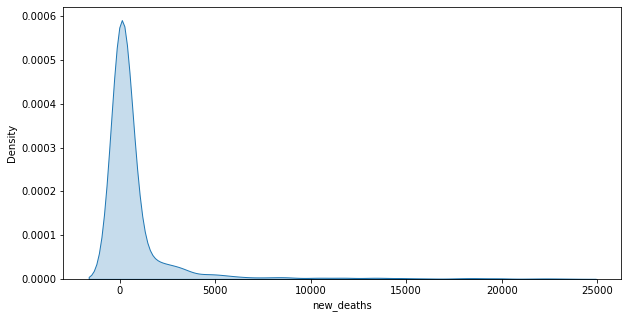

In [17]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='new_deaths', fill=True, label='Density Plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x360 with 0 Axes>

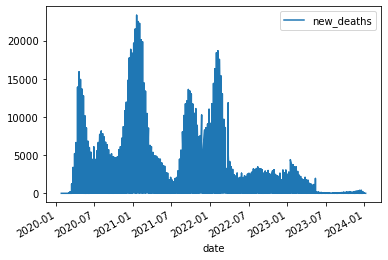

In [18]:
plt.figure(figsize=(10,5))
df.plot.line(x='date',y='new_deaths')
plt.show

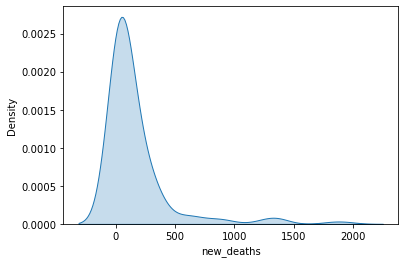

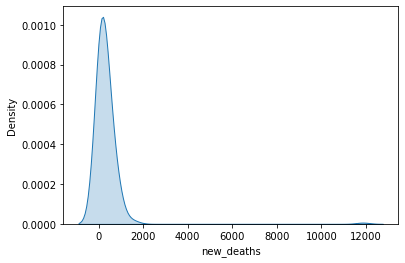

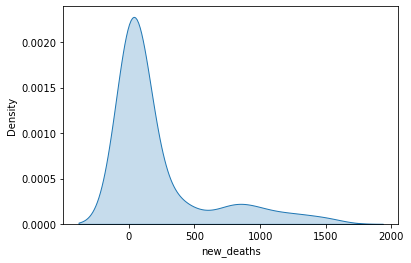

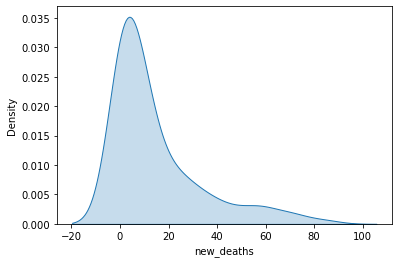

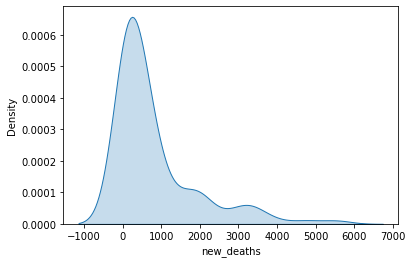

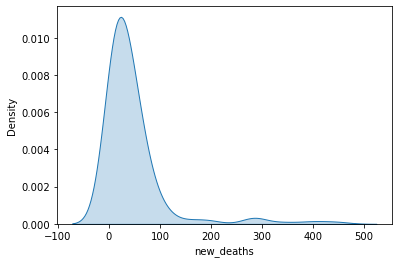

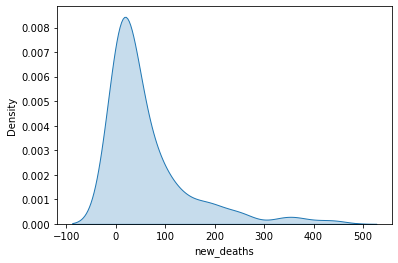

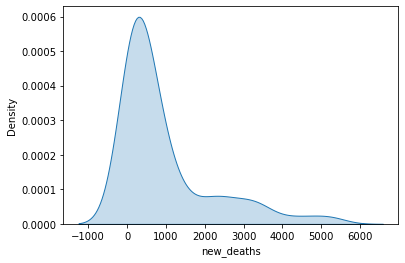

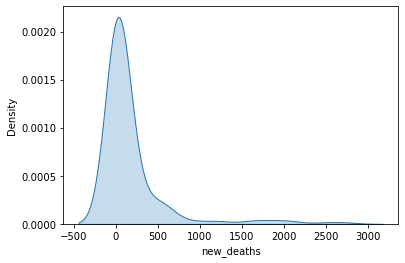

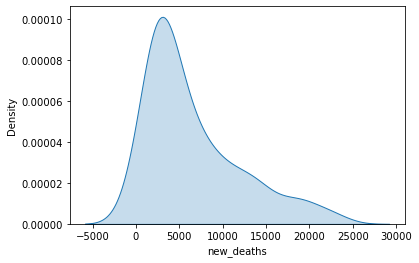

In [19]:
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    sns.kdeplot(data=country_data, x='new_deaths', fill=True)
    plt.show()

# The (Numeric) Predictors

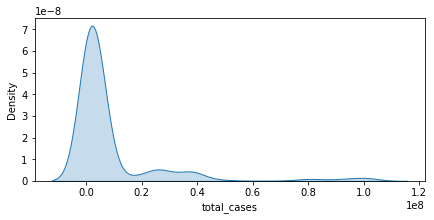

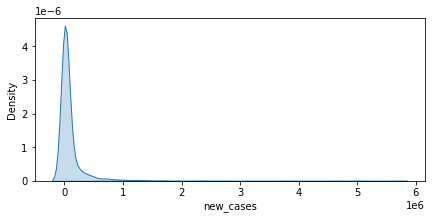

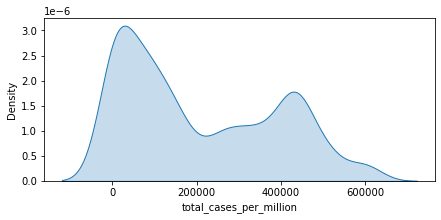

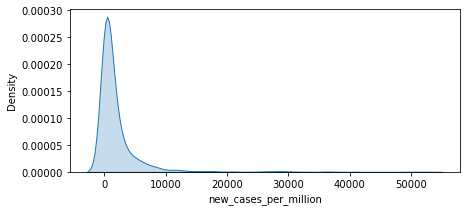

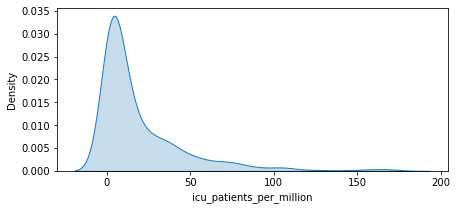

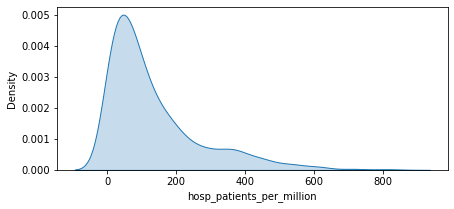

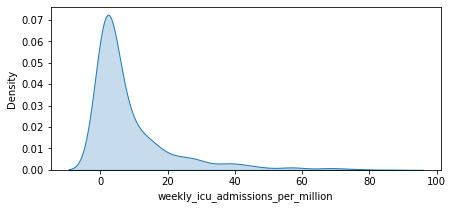

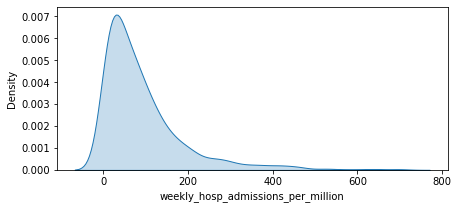

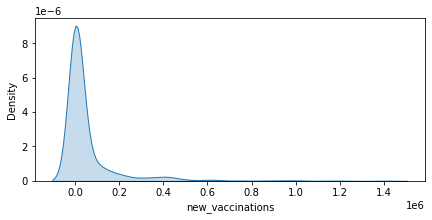

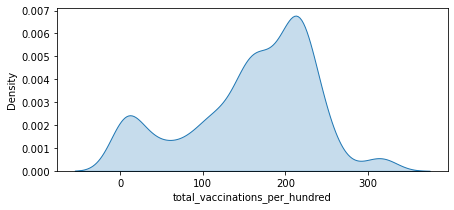

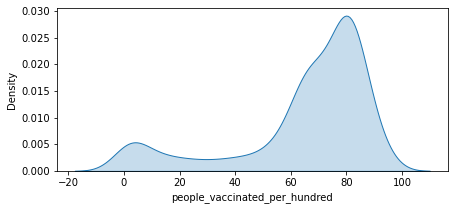

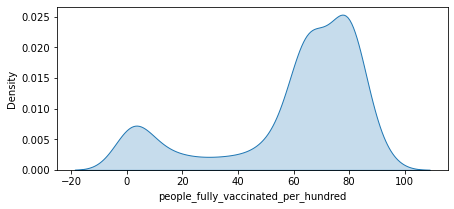

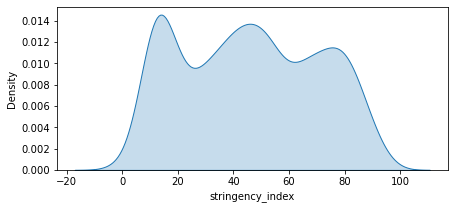

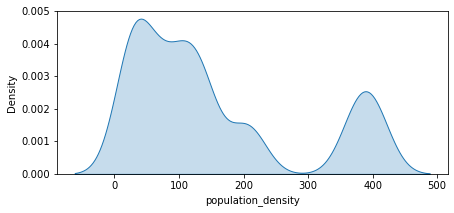

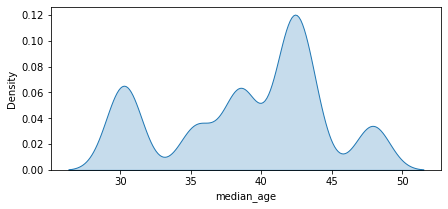

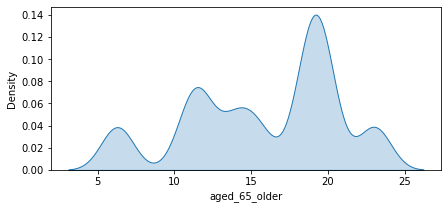

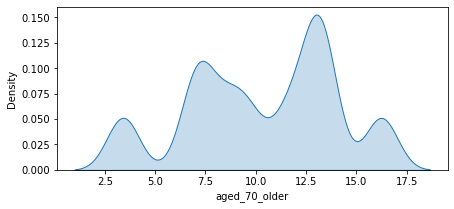

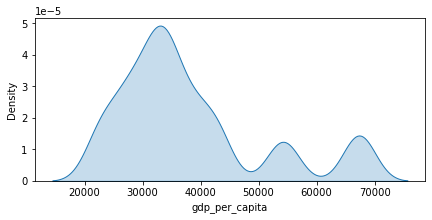

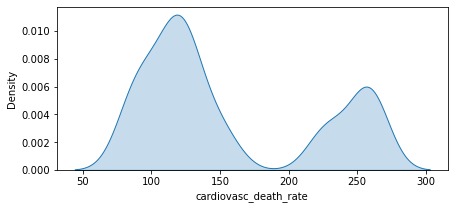

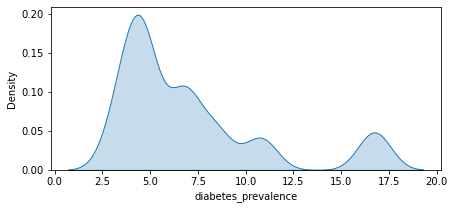

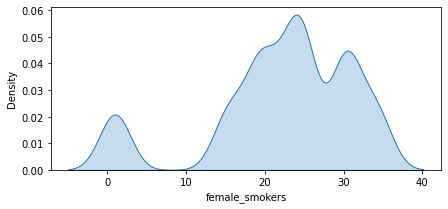

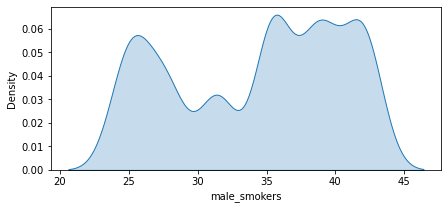

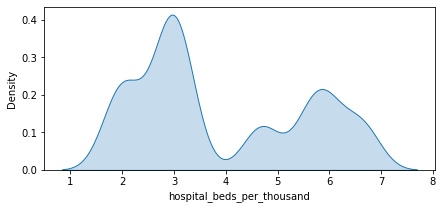

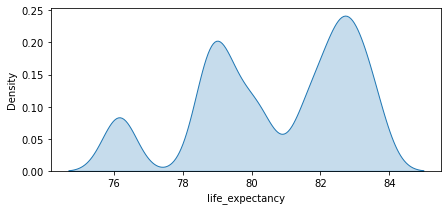

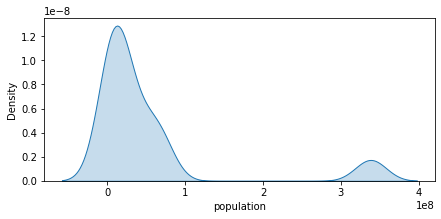

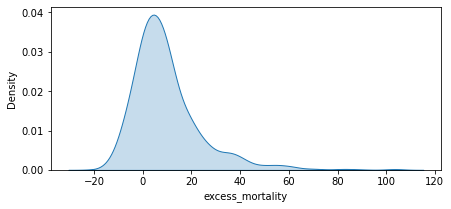

In [20]:
num_var = df.select_dtypes(include=['float64', 'int64']).columns
nontarget = [var for var in num_var if var != 'new_deaths']

for var in nontarget:
    plt.figure(figsize=(7,3))
    sns.kdeplot(data=df, x=var, fill=True)
    plt.show()



# Correlations Among Predictors

In [21]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

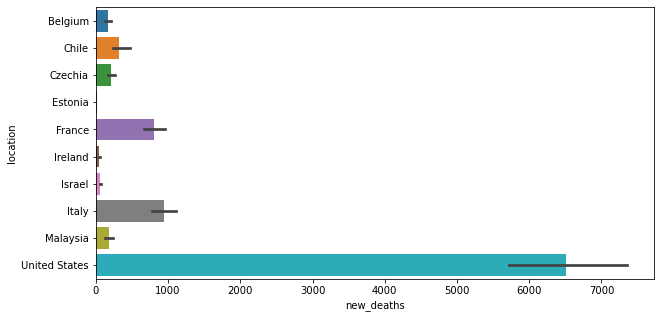

In [22]:
# Outliers Visualization

plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='new_deaths', y="location", fill=True, label='Density Plot')
plt.show()

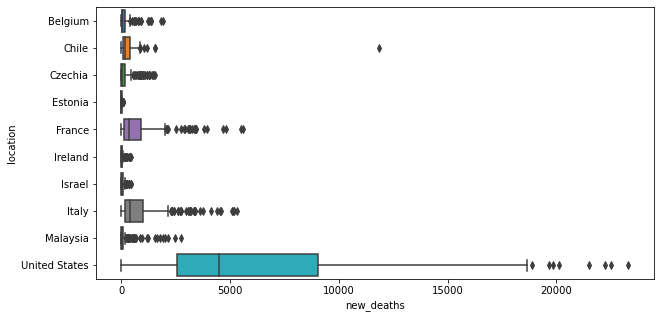

In [23]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='new_deaths', y="location")
plt.show()

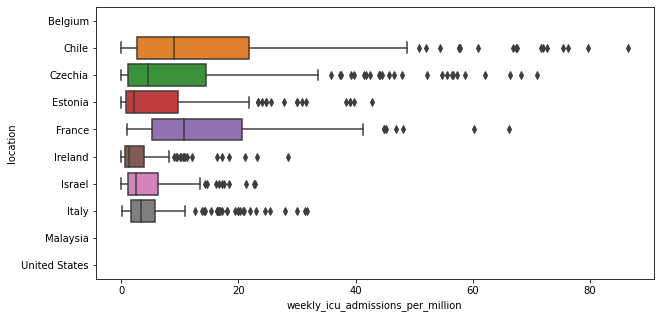

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='weekly_icu_admissions_per_million', y="location")
plt.show()

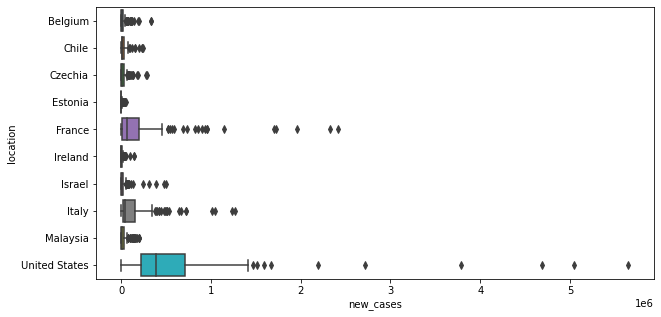

In [25]:
#new cases
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='new_cases', y="location")
plt.show()

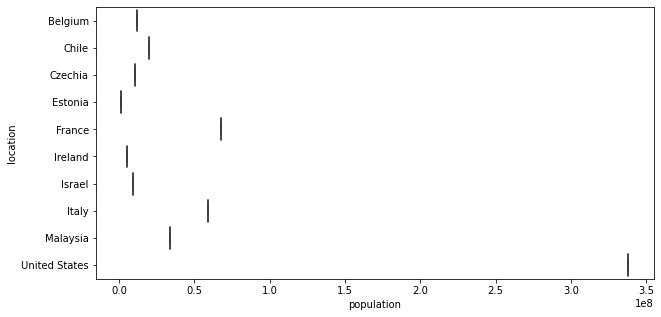

In [26]:
# is this visualization necessary?

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='population', y="location")
plt.show()

# Correlation Analysis

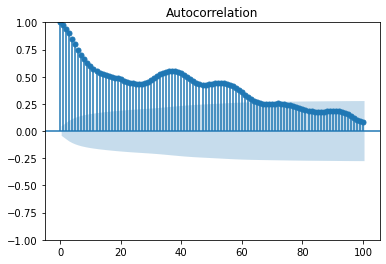

In [27]:
plot_acf(df['new_deaths'], lags = 100)
plt.show()

There seems to be significant correlation (strong, positive correlation) for all lag values

/Users/ChloeSokol/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


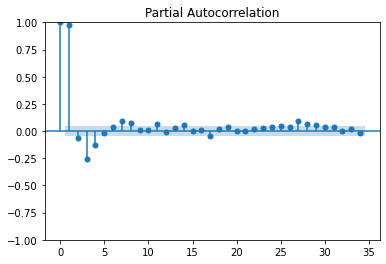

In [28]:
plot_pacf(df['new_deaths'])
plt.show()

The first couple of lags indicate a very strong correlation, though it changes from positive to negative. The rest of the lags are usually within the confidence interval, meaning a weaker correlation, though there may be an underlying pattern of seasonality to explore.

In [29]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [30]:
check_stationarity(df['new_deaths'])

ADF Statistic: -3.497720
p-value: 0.008046
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


The sample data is stationary. Therefore, we do not need to difference the time series.

## Seasonal Decomposition

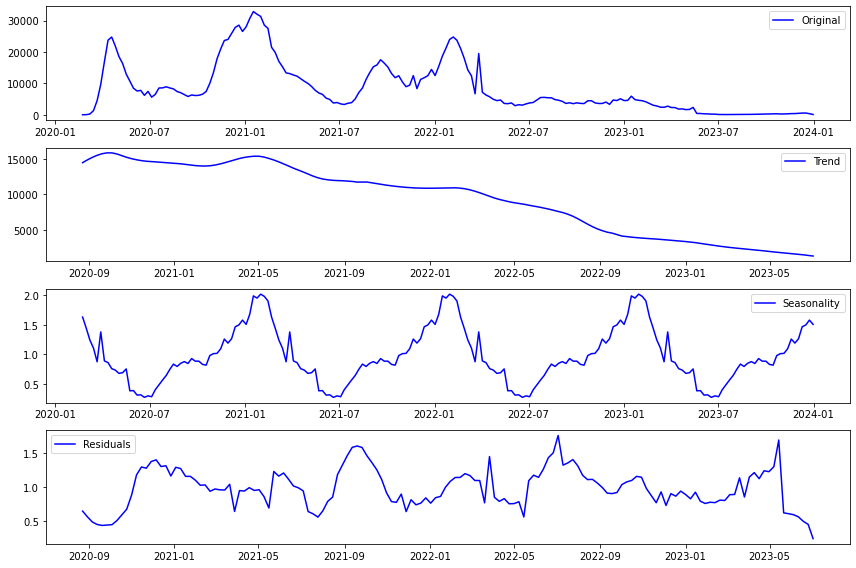

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

## seasonality aggregated by day

from statsmodels.tsa.seasonal import seasonal_decompose
grouped_death = df[['date','new_deaths']].groupby('date').sum()
grouped_death = grouped_death[grouped_death['new_deaths']!=0]
decomposition = seasonal_decompose(grouped_death, model='multiplicative', period=52) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(grouped_death['new_deaths'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

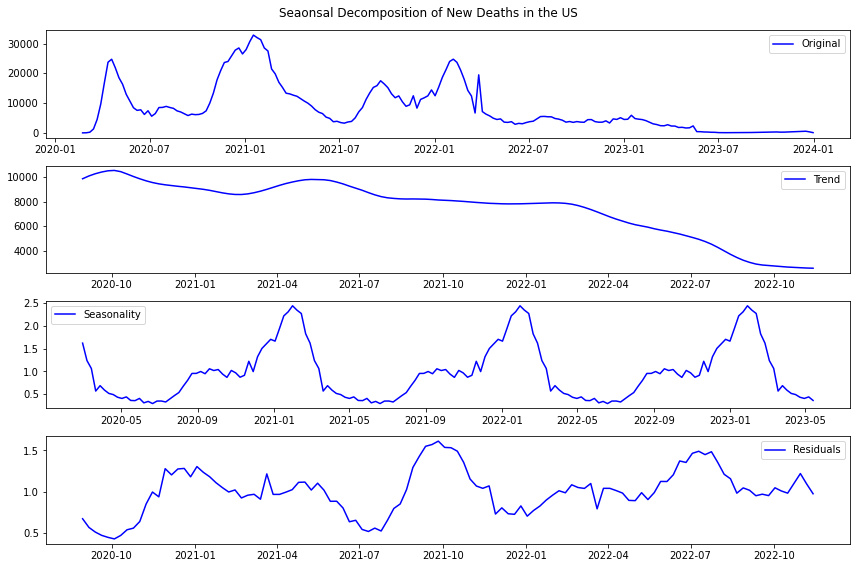

In [32]:
# US specific

US_df = df[df['location'] == 'United States']


from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

## seasonality aggregated by day

from statsmodels.tsa.seasonal import seasonal_decompose
US_df = US_df[US_df['new_deaths']!=0]
# make series of US death index by date
US_series = US_df['new_deaths'].reset_index(drop=True)
US_series.index = US_df['date']
decomposition = seasonal_decompose(US_series, model='multiplicative', period=52) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(grouped_death['new_deaths'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.suptitle('Seaonsal Decomposition of New Deaths in the US')
plt.tight_layout()

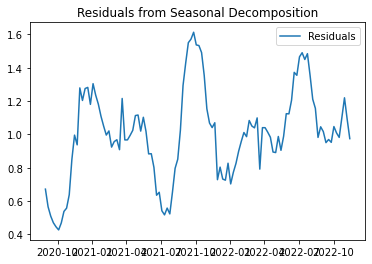

Statistics=0.134, p=0.935
Residuals look Gaussian (fail to reject H0)


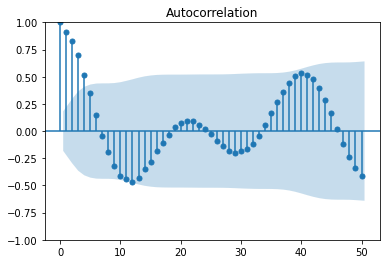

In [33]:
residuals = decomposition.resid.dropna()  

plt.figure()
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals from Seasonal Decomposition')
plt.show()

# Statistical tests on residuals
from scipy.stats import normaltest
stat, p = normaltest(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('Residuals look Gaussian (fail to reject H0)')
else:
    print('Residuals do not look Gaussian (reject H0)')

# Checking for autocorrelation in residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=50)
plt.show()

The residuals plot shows that there are fluctuations over time without a clear or consistent pattern, suggesting that the data has been appropriately de-seasonalized.

The normality test reports a statistic of -0.553 with a p-value of 0.758. Since the p-value is well above the common alpha level of 0.05, we fail to reject the null hypothesis, which means there is not enough evidence to say the residuals are not normally distributed. This is a good sign, as it suggests that the residuals, which represent the noise or error of the seasonal decomposition, do not have any systematic structure that could be modeled.

The second plot displays the autocorrelation of these residuals. Ideally, if all temporal dependencies have been accounted for in the decomposition, the autocorrelation values should fall within the blue shaded area, which represents the confidence interval for the autocorrelation being zero (no autocorrelation). Here, several points fall outside of the confidence interval, particularly at the first few lags, indicating some degree of autocorrelation in the residuals. This could suggest there's still some temporal structure not captured by the decomposition.

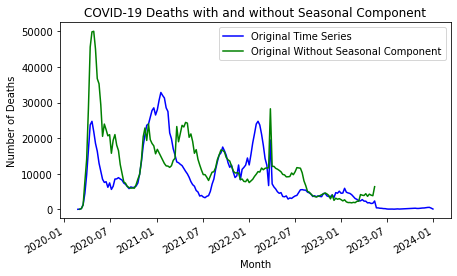

In [34]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))
# Plot the original time series data
plt.plot(grouped_death, label='Original Time Series', color='blue')
data_without_seasonal = grouped_death['new_deaths'] / decomposition.seasonal
plt.plot(data_without_seasonal, label='Original Without Seasonal Component', color='green')
# Plot the original data without the seasonal component
plt.title('COVID-19 Deaths with and without Seasonal Component')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

## Multivariate Analysis

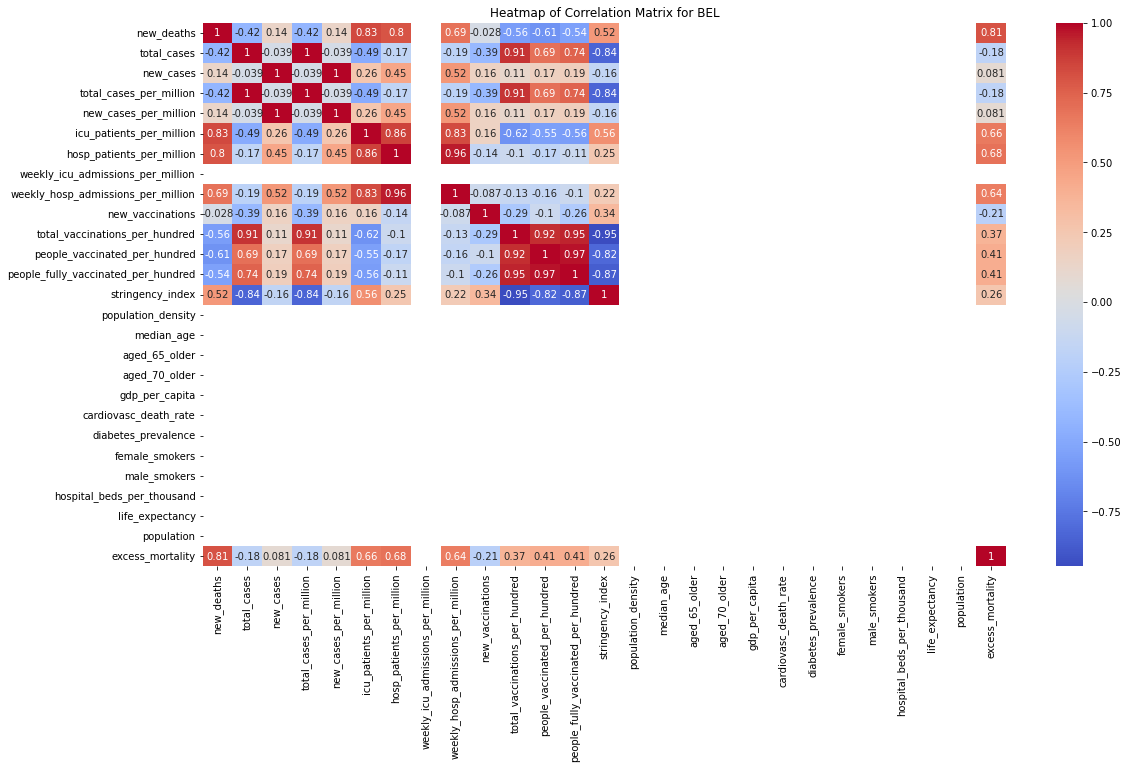

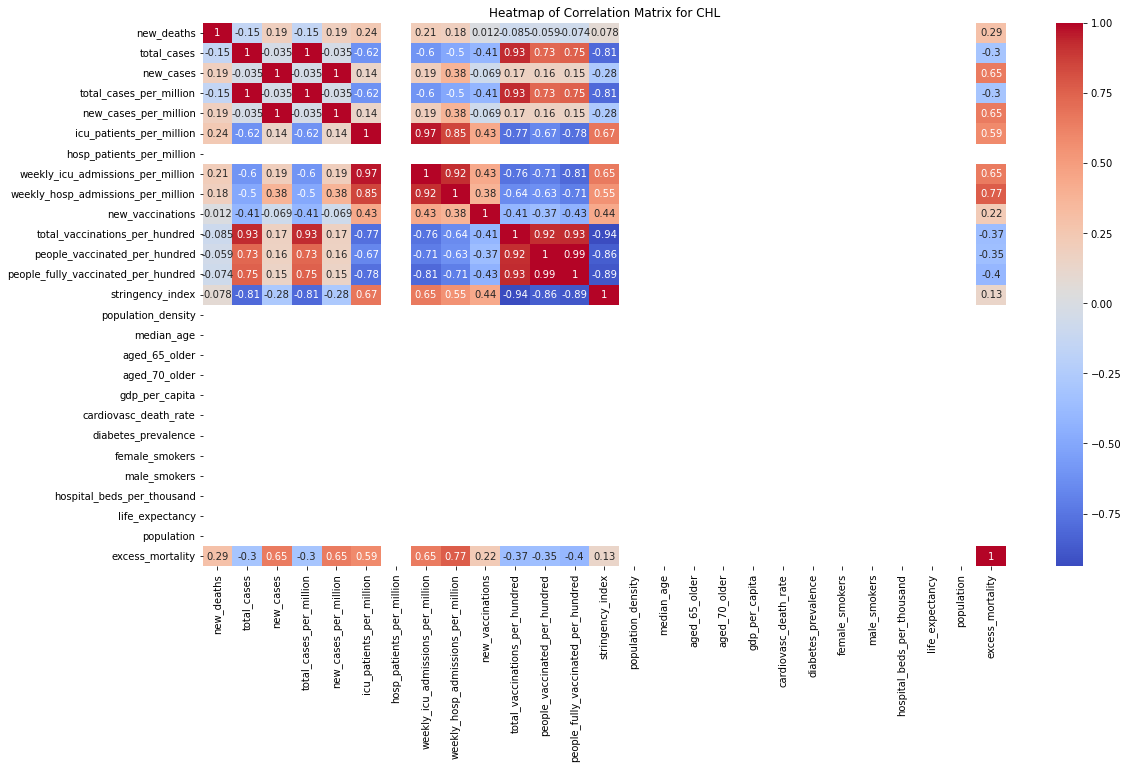

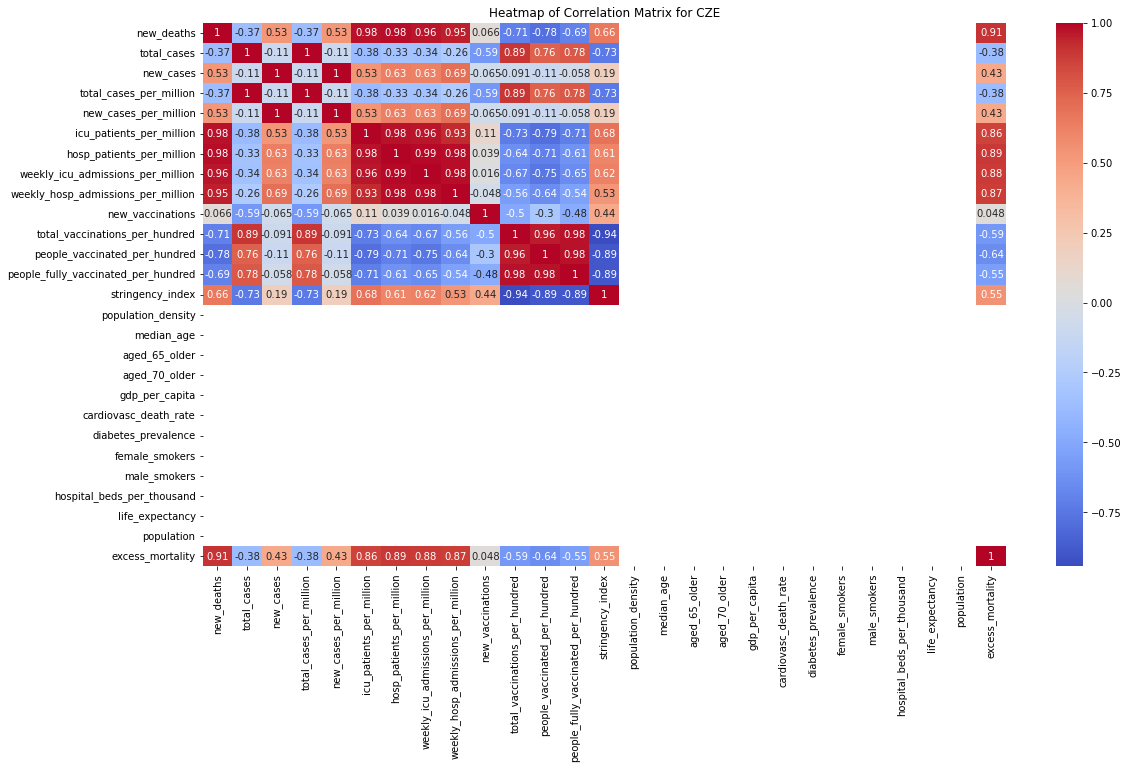

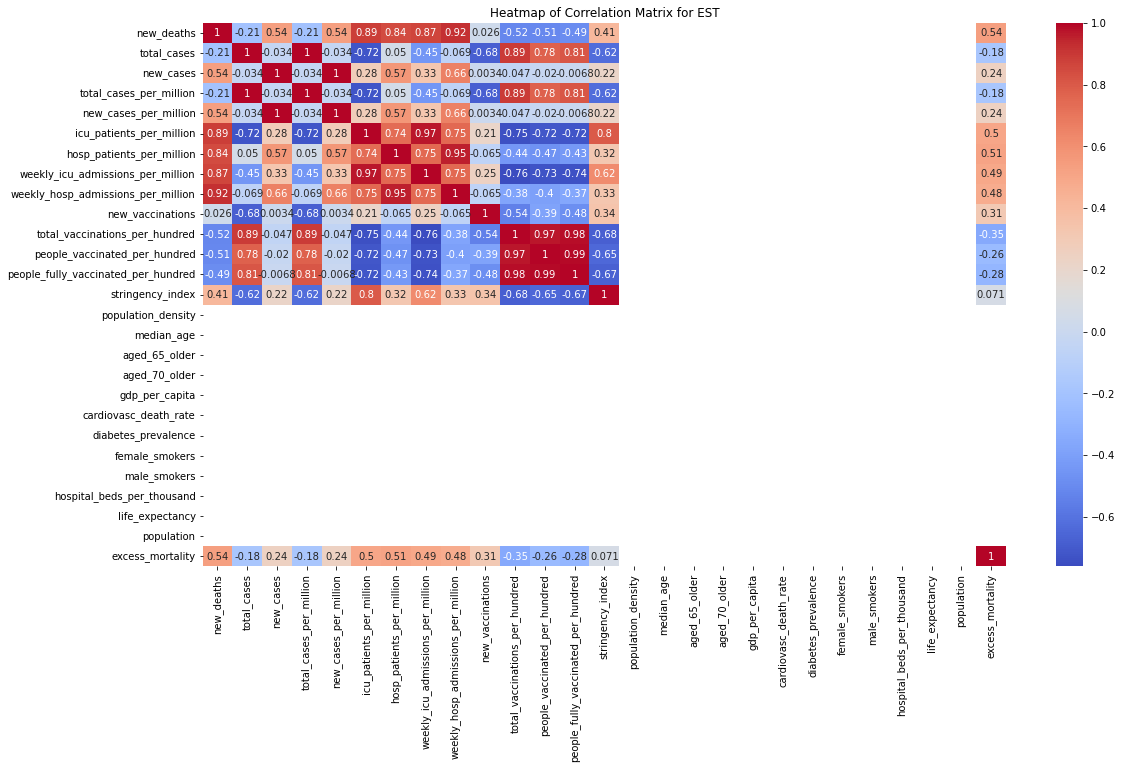

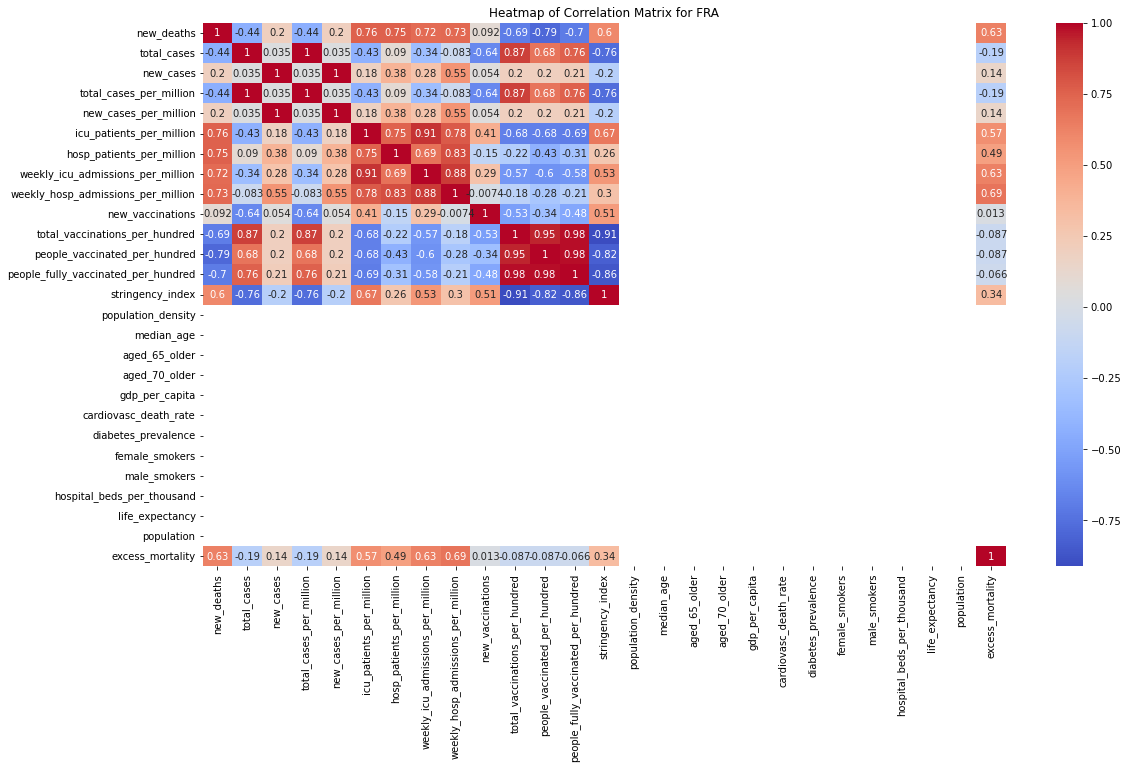

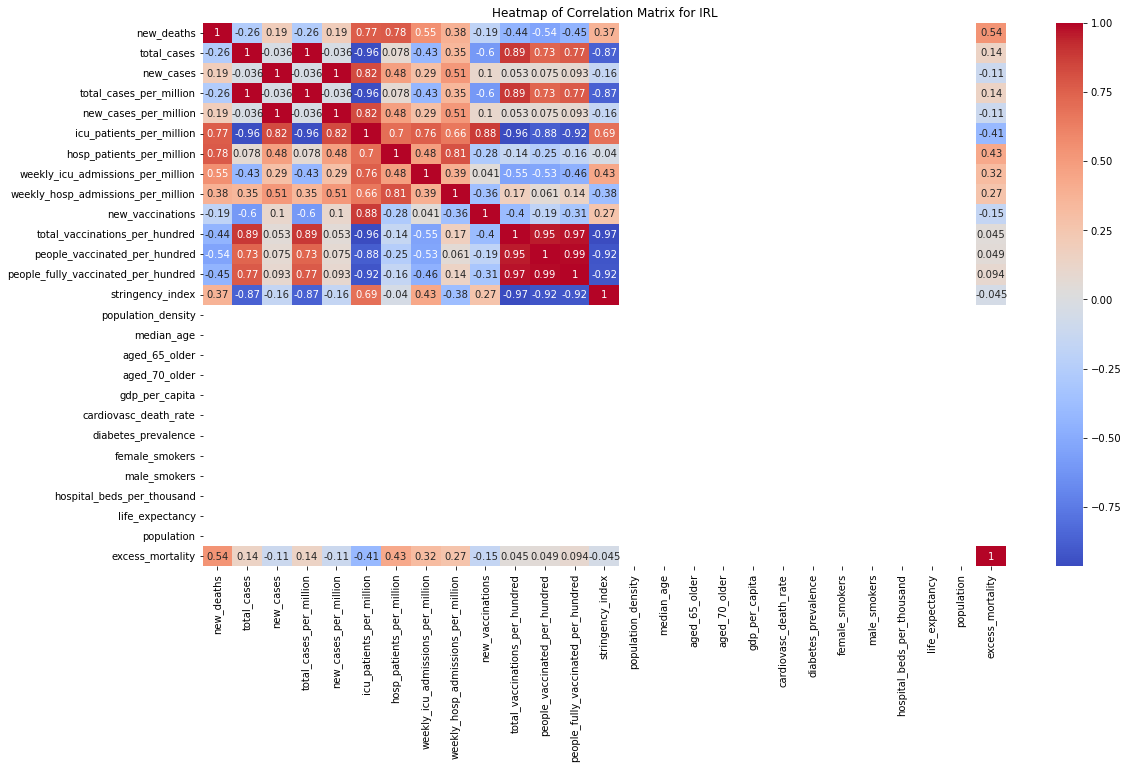

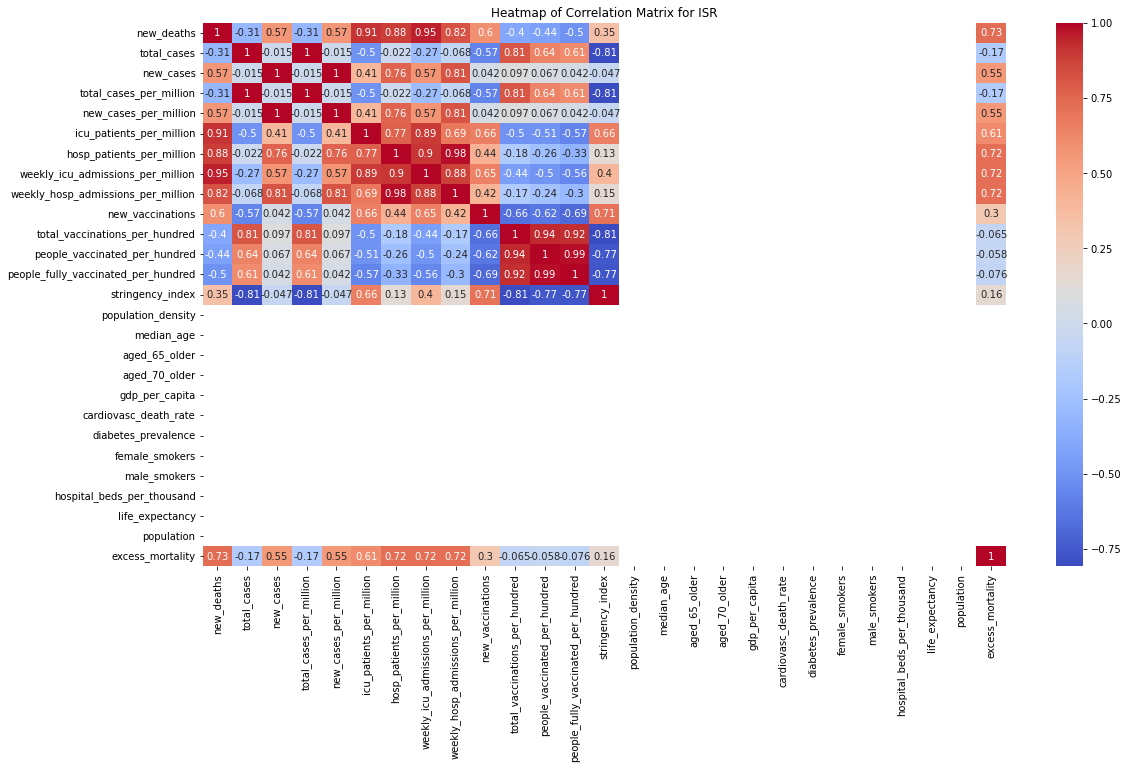

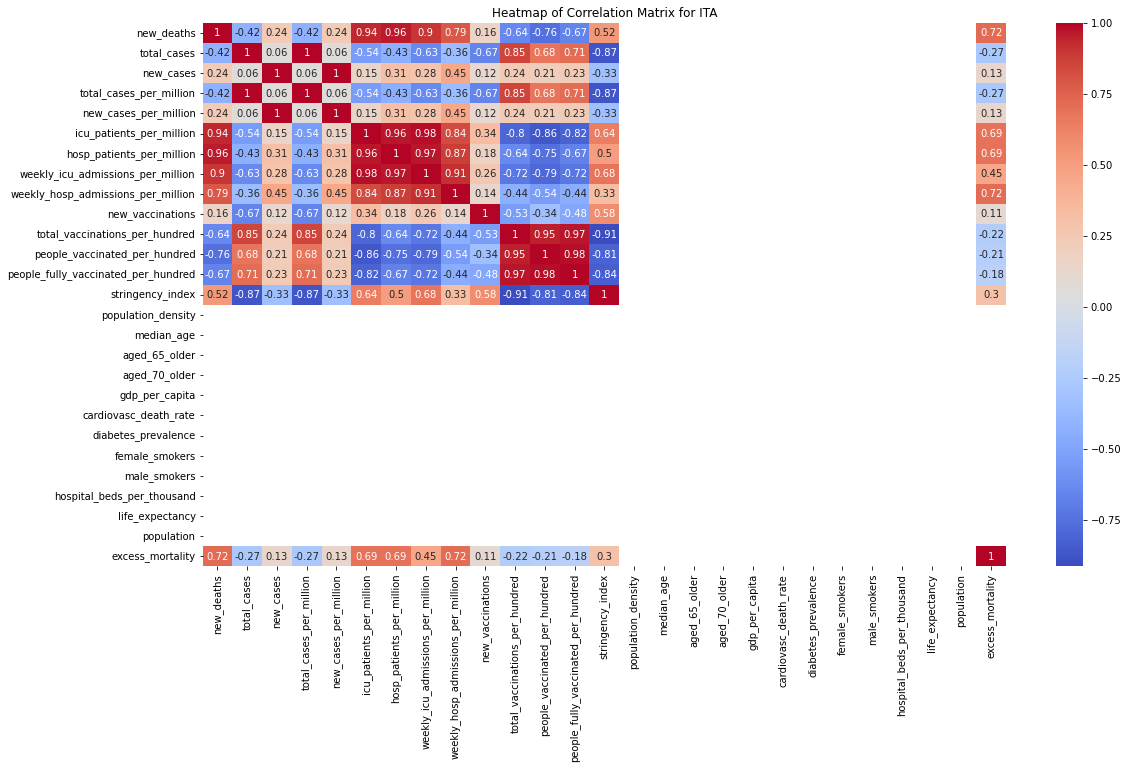

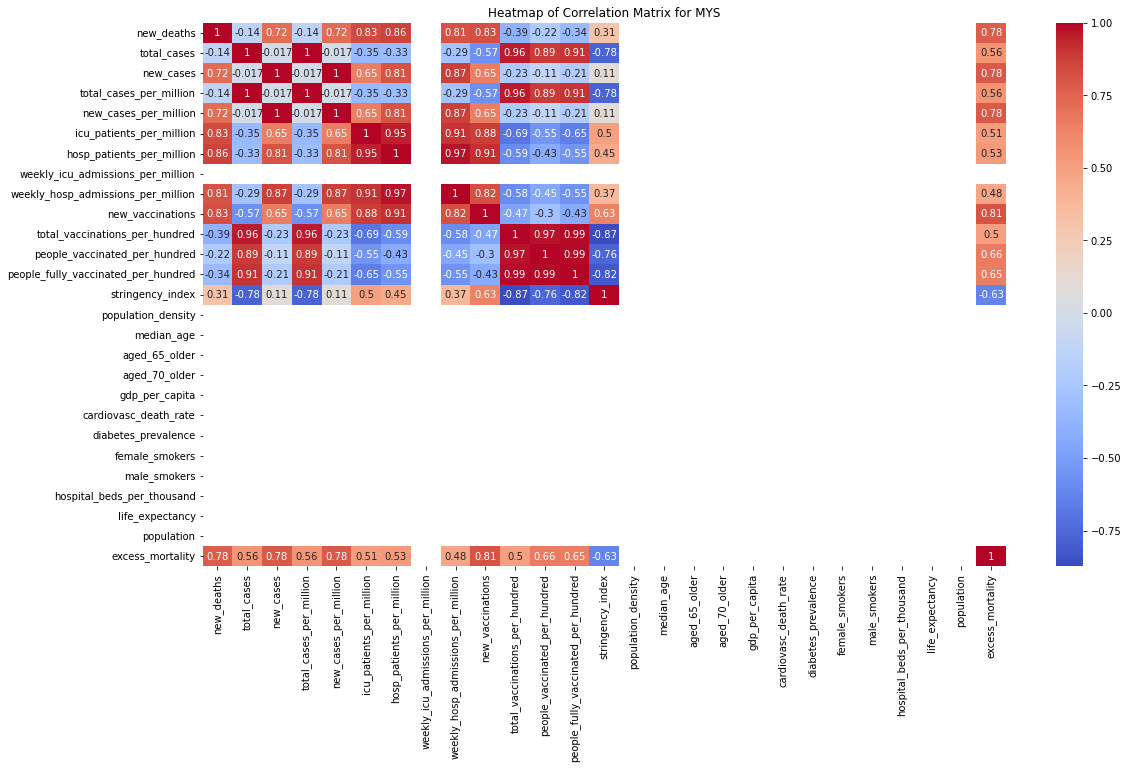

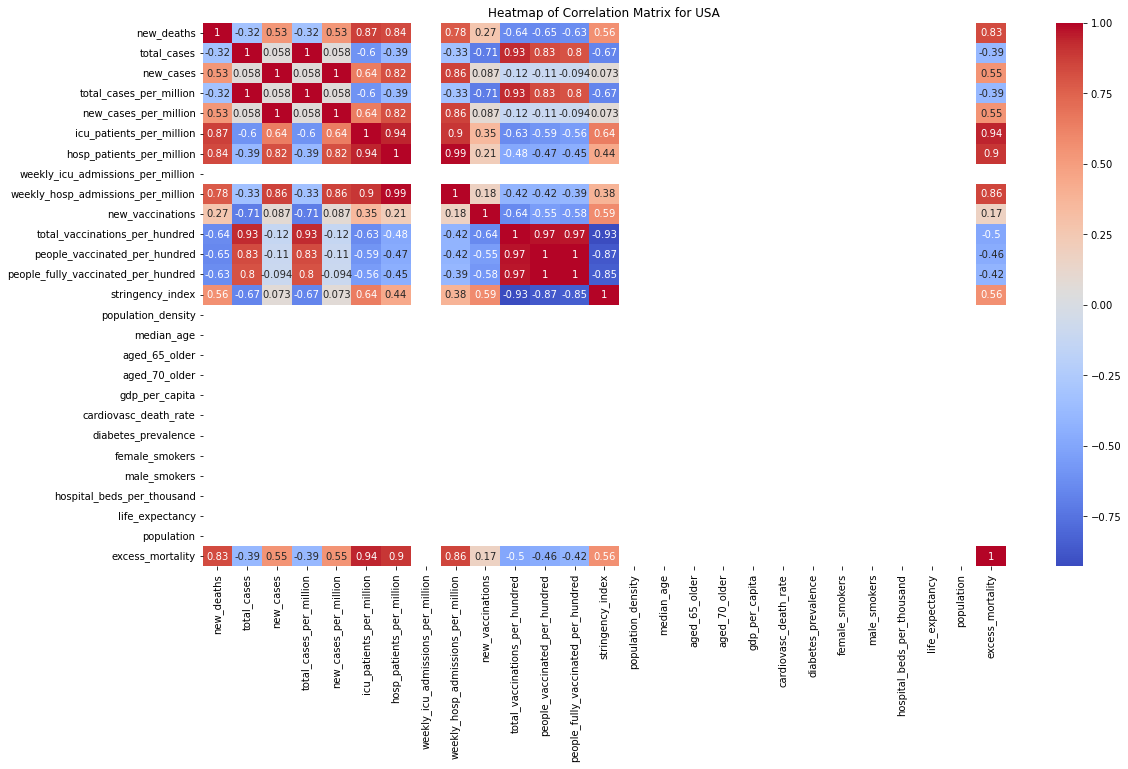

In [35]:
countries = df['iso_code'].unique()

predictors = [
    "total_cases", "new_cases", "total_cases_per_million", 
    "new_cases_per_million", "icu_patients_per_million", 
    "hosp_patients_per_million", "weekly_icu_admissions_per_million", 
    "weekly_hosp_admissions_per_million", "tests_units", 
    "new_vaccinations", "total_vaccinations_per_hundred", 
    "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", 
    "stringency_index", "population_density", "median_age", 
    "aged_65_older", "aged_70_older", "gdp_per_capita", 
    "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", 
    "male_smokers", "hospital_beds_per_thousand", "life_expectancy", 
    "population", "excess_mortality"
]

for country in countries:
    df_country = df[df['iso_code'] == country]

    correlation_matrix = df_country[['new_deaths'] + predictors].corr()

    plt.figure(figsize=(18, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap of Correlation Matrix for {country}')
    plt.show()



In [36]:

predictors = [
    "total_cases", "new_cases", "total_cases_per_million", 
    "new_cases_per_million", "icu_patients_per_million", 
    "hosp_patients_per_million", "weekly_icu_admissions_per_million", 
    "weekly_hosp_admissions_per_million", "tests_units", 
    "new_vaccinations", "total_vaccinations_per_hundred", 
    "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", 
    "stringency_index", "population_density", "median_age", 
    "aged_65_older", "aged_70_older", "gdp_per_capita", 
    "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", 
    "male_smokers", "hospital_beds_per_thousand", "life_expectancy", 
    "population", "excess_mortality"
]

country_correlations = {}

for country in df['iso_code'].unique():
    country_df = df[df['iso_code'] == country]
    correlation_matrix = country_df[['new_deaths'] + predictors].corr()
    new_deaths_correlations = correlation_matrix['new_deaths'].drop('new_deaths')
    country_correlations[country] = new_deaths_correlations

correlation_df = pd.DataFrame(country_correlations).T
correlation_df


total_cases  new_cases  total_cases_per_million  new_cases_per_million  \
BEL    -0.417919   0.135305                -0.417919               0.135305   
CHL    -0.145837   0.188657                -0.145837               0.188657   
CZE    -0.369679   0.528502                -0.369679               0.528502   
EST    -0.207891   0.537973                -0.207891               0.537973   
FRA    -0.440520   0.195574                -0.440520               0.195574   
IRL    -0.260743   0.186837                -0.260743               0.186837   
ISR    -0.308308   0.565512                -0.308308               0.565512   
ITA    -0.424385   0.244128                -0.424385               0.244128   
MYS    -0.139106   0.717361                -0.139106               0.717362   
USA    -0.321011   0.529603                -0.321011               0.529603   

     icu_patients_per_million  hosp_patients_per_million  \
BEL                  0.833533                   0.798361   
CHL                  0.240537                        NaN   
CZE                  0.976595                   0.980247   
EST                  0.889131                   0.844533   
FRA                  0.756689                   0.754062   
IRL                  0.766301                   0.776083   
ISR                  0.911311                   0.881613   
ITA                  0.936806                   0.960329   
MYS                  0.834814                   0.864866   
USA                  0.866011                   0.840362   

     weekly_icu_admissions_per_million  weekly_hosp_admissions_per_million  \
BEL                                NaN                            0.687131   
CHL                           0.208060                            0.184385   
CZE                           0.964282                            0.946896   
EST                           0.867506                            0.917510   
FRA                           0.717206                            0.726607   
IRL                           0.548966                            0.382006   
ISR                           0.952836                            0.822317   
ITA                           0.901152                            0.786597   
MYS                                NaN                            0.813280   
USA                                NaN                            0.780994   

     new_vaccinations  total_vaccinations_per_hundred  ...  aged_70_older  \
BEL         -0.027823                       -0.564159  ...            NaN   
CHL          0.012098                       -0.084889  ...            NaN   
CZE          0.065818                       -0.705356  ...            NaN   
EST          0.026060                       -0.516581  ...            NaN   
FRA          0.091743                       -0.689186  ...            NaN   
IRL         -0.189268                       -0.443830  ...            NaN   
ISR          0.597306                       -0.398568  ...            NaN   
ITA          0.163090                       -0.639684  ...            NaN   
MYS          0.830021                       -0.389600  ...            NaN   
USA          0.267050                       -0.640874  ...            NaN   

     gdp_per_capita  cardiovasc_death_rate  diabetes_prevalence  \
BEL             NaN                    NaN                  NaN   
CHL             NaN                    NaN                  NaN   
CZE             NaN                    NaN                  NaN   
EST             NaN                    NaN                  NaN   
FRA             NaN                    NaN                  NaN   
IRL             NaN                    NaN                  NaN   
ISR             NaN                    NaN                  NaN   
ITA             NaN                    NaN                  NaN   
MYS             NaN                    NaN                  NaN   
USA             NaN                    NaN                  NaN   

     female_smokers  male_smo

In [37]:
correlation_df_cleaned = correlation_df.dropna(axis=1, how='any')
correlation_df_cleaned

total_cases  new_cases  total_cases_per_million  new_cases_per_million  \
BEL    -0.417919   0.135305                -0.417919               0.135305   
CHL    -0.145837   0.188657                -0.145837               0.188657   
CZE    -0.369679   0.528502                -0.369679               0.528502   
EST    -0.207891   0.537973                -0.207891               0.537973   
FRA    -0.440520   0.195574                -0.440520               0.195574   
IRL    -0.260743   0.186837                -0.260743               0.186837   
ISR    -0.308308   0.565512                -0.308308               0.565512   
ITA    -0.424385   0.244128                -0.424385               0.244128   
MYS    -0.139106   0.717361                -0.139106               0.717362   
USA    -0.321011   0.529603                -0.321011               0.529603   

     icu_patients_per_million  weekly_hosp_admissions_per_million  \
BEL                  0.833533                            0.687131   
CHL                  0.240537                            0.184385   
CZE                  0.976595                            0.946896   
EST                  0.889131                            0.917510   
FRA                  0.756689                            0.726607   
IRL                  0.766301                            0.382006   
ISR                  0.911311                            0.822317   
ITA                  0.936806                            0.786597   
MYS                  0.834814                            0.813280   
USA                  0.866011                            0.780994   

     new_vaccinations  total_vaccinations_per_hundred  \
BEL         -0.027823                       -0.564159   
CHL          0.012098                       -0.084889   
CZE          0.065818                       -0.705356   
EST          0.026060                       -0.516581   
FRA          0.091743                       -0.689186   
IRL         -0.189268                       -0.443830   
ISR          0.597306                       -0.398568   
ITA          0.163090                       -0.639684   
MYS          0.830021                       -0.389600   
USA          0.267050                       -0.640874   

     people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
BEL                      -0.612742                            -0.542001   
CHL                      -0.058564                            -0.073874   
CZE                      -0.781882                            -0.693545   
EST                      -0.506395                            -0.490385   
FRA                      -0.792899                            -0.701431   
IRL                      -0.540263                            -0.450582   
ISR                      -0.437693                            -0.502554   
ITA                      -0.755434                            -0.665433   
MYS                      -0.217900                            -0.335600   
USA                      -0.649220                            -0.630310   

     stringency_index  excess_mortality  
BEL          0.518348          0.809810  
CHL          0.078448          0.292436  
CZE          0.662993          0.907690  
EST          0.410705          0.536427  
FRA          0.599161          0.627879  
IRL          0.374933          0.537877  
ISR          0.347213          0.727000  
ITA          0.523942          0.719464  
MYS          0.306633          0.778646  
USA          0.563197          0.829746

In [38]:
correlation_stats = correlation_df_cleaned.describe()

from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(correlation_df_cleaned)

correlation_df_cleaned['Cluster'] = cluster_labels

cluster_stats = correlation_df_cleaned.groupby('Cluster').mean()
print("\nCluster Statistics:")
cluster_stats



Cluster Statistics:


/var/folders/wd/1wgl396j6ddcxnk20n91fc840000gn/T/ipykernel_41367/3860147478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df_cleaned['Cluster'] = cluster_labels


total_cases  new_cases  total_cases_per_million  \
Cluster                                                    
0          -0.260743   0.186837                -0.260743   
1          -0.223707   0.641437                -0.223707   
2          -0.299527   0.532026                -0.299527   
3          -0.145837   0.188657                -0.145837   
4          -0.427608   0.191669                -0.427608   

         new_cases_per_million  icu_patients_per_million  \
Cluster                                                    
0                     0.186837                  0.766301   
1                     0.641437                  0.873063   
2                     0.532026                  0.910579   
3                     0.188657                  0.240537   
4                     0.191669                  0.842343   

         weekly_hosp_admissions_per_million  new_vaccinations  \
Cluster                                                         
0                                  0.382006         -0.189268   
1                                  0.817798          0.713664   
2                                  0.881800          0.119643   
3                                  0.184385          0.012098   
4                                  0.733445          0.075670   

         total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
Cluster                                                                  
0                             -0.443830                      -0.540263   
1                             -0.394084                      -0.327796   
2                             -0.620937                      -0.645832   
3                             -0.084889                      -0.058564   
4                             -0.631010                      -0.720358   

         people_fully_vaccinated_per_hundred  stringency_index  \
Cluster                                                          
0                                  -0.450582          0.374933   
1                                  -0.419077          0.326923   
2                                  -0.604747          0.545631   
3                                  -0.073874          0.078448   
4                                  -0.636288          0.547151   

         excess_mortality  
Cluster                    
0                0.537877  
1                0.752823  
2                0.757954  
3                0.292436  
4                0.719051

total_cases and total_cases_per_million have negative mean values in all clusters, possibly indicating that as the total cases increase, new deaths could decrease.

new_cases and new_cases_per_million have positive correlations in all clusters, which suggests that as new cases increase, there's a related increase in new deaths.

icu_patients_per_million and weekly_hosp_admissions_per_million tend to have higher positive correlations in clusters 2 and 3, hinting that these clusters may represent more severe outbreak periods or regions with higher stress on the healthcare system.

new_vaccinations has a notably high positive correlation in cluster 2, which might be indicative of a strong vaccination response during certain periods or in specific regions.

excess_mortality shows positive mean correlations across all clusters but varies in magnitude, suggesting different levels of mortality impact across the clusters.

This can help in understanding what predictors would work best for each country, and for understanding the most common and impactful predictors amongst the countries.

In [39]:
correlation_df_cleaned 

total_cases  new_cases  total_cases_per_million  new_cases_per_million  \
BEL    -0.417919   0.135305                -0.417919               0.135305   
CHL    -0.145837   0.188657                -0.145837               0.188657   
CZE    -0.369679   0.528502                -0.369679               0.528502   
EST    -0.207891   0.537973                -0.207891               0.537973   
FRA    -0.440520   0.195574                -0.440520               0.195574   
IRL    -0.260743   0.186837                -0.260743               0.186837   
ISR    -0.308308   0.565512                -0.308308               0.565512   
ITA    -0.424385   0.244128                -0.424385               0.244128   
MYS    -0.139106   0.717361                -0.139106               0.717362   
USA    -0.321011   0.529603                -0.321011               0.529603   

     icu_patients_per_million  weekly_hosp_admissions_per_million  \
BEL                  0.833533                            0.687131   
CHL                  0.240537                            0.184385   
CZE                  0.976595                            0.946896   
EST                  0.889131                            0.917510   
FRA                  0.756689                            0.726607   
IRL                  0.766301                            0.382006   
ISR                  0.911311                            0.822317   
ITA                  0.936806                            0.786597   
MYS                  0.834814                            0.813280   
USA                  0.866011                            0.780994   

     new_vaccinations  total_vaccinations_per_hundred  \
BEL         -0.027823                       -0.564159   
CHL          0.012098                       -0.084889   
CZE          0.065818                       -0.705356   
EST          0.026060                       -0.516581   
FRA          0.091743                       -0.689186   
IRL         -0.189268                       -0.443830   
ISR          0.597306                       -0.398568   
ITA          0.163090                       -0.639684   
MYS          0.830021                       -0.389600   
USA          0.267050                       -0.640874   

     people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
BEL                      -0.612742                            -0.542001   
CHL                      -0.058564                            -0.073874   
CZE                      -0.781882                            -0.693545   
EST                      -0.506395                            -0.490385   
FRA                      -0.792899                            -0.701431   
IRL                      -0.540263                            -0.450582   
ISR                      -0.437693                            -0.502554   
ITA                      -0.755434                            -0.665433   
MYS                      -0.217900                            -0.335600   
USA                      -0.649220                            -0.630310   

     stringency_index  excess_mortality  Cluster  
BEL          0.518348          0.809810        4  
CHL          0.078448          0.292436        3  
CZE          0.662993          0.907690        2  
EST          0.410705          0.536427        2  
FRA          0.599161          0.627879        4  
IRL          0.374933          0.537877        0  
ISR          0.347213          0.727000        1  
ITA          0.523942          0.719464        4  
MYS          0.306633          0.778646        1  
USA          0.563197          0.829746        2

PCA Loadings:
                                          PC1       PC2       PC3
total_cases                          0.037233 -0.039190  0.376907
new_cases                            0.102385  0.105000  0.332136
new_deaths                           0.108539  0.179894  0.352607
total_cases_per_million              0.015589 -0.248140  0.027217
new_cases_per_million                0.117677  0.061940  0.040151
icu_patients_per_million             0.206448  0.286053 -0.050493
hosp_patients_per_million            0.251753  0.203422 -0.046610
weekly_icu_admissions_per_million    0.146309  0.273365 -0.110876
weekly_hosp_admissions_per_million   0.170875  0.267957 -0.012997
new_vaccinations                     0.058105  0.139199  0.259256
total_vaccinations_per_hundred      -0.161198 -0.272185  0.125796
people_vaccinated_per_hundred       -0.163611 -0.264824  0.155368
people_fully_vaccinated_per_hundred -0.167763 -0.265292  0.122887
stringency_index                     0.091313  0.250361 -0.050

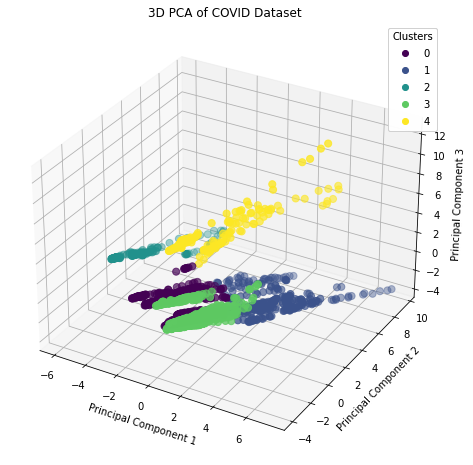

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df['new_deaths'].fillna(method='bfill', inplace=True)  
numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_df_imputed = imputer.fit_transform(numerical_df)
numerical_df = pd.DataFrame(numerical_df_imputed, columns=numerical_df.columns)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_df)


pca = PCA(n_components=3)  
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3'], index=numerical_df.columns)
print("PCA Loadings:")
print(loadings_df)

for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    corr = np.corrcoef(numerical_df['new_deaths'], principal_components[:, i])[0, 1]
    print(f"Correlation of 'new_deaths' with {pc}: {corr:.2f}")

kmeans = KMeans(n_clusters=5) 
principal_df['Cluster'] = kmeans.fit_predict(principal_components)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'],
                     c=principal_df['Cluster'], s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of COVID Dataset')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


The correlation values suggest that new_deaths is most strongly correlated with PC3, then PC2, and has a weaker correlation with PC1. Since these are all positive correlations, we can infer that as the values for PC3 increase, the number of new_deaths tends to increase as well. It is also important to look at other variables that have high loadings on PC3, as these may be associated with new_deaths. For example, variables related to vaccinations and GDP have high loadings on PC1, suggesting that this component may represent the severity of the pandemic in terms of the economic impact.

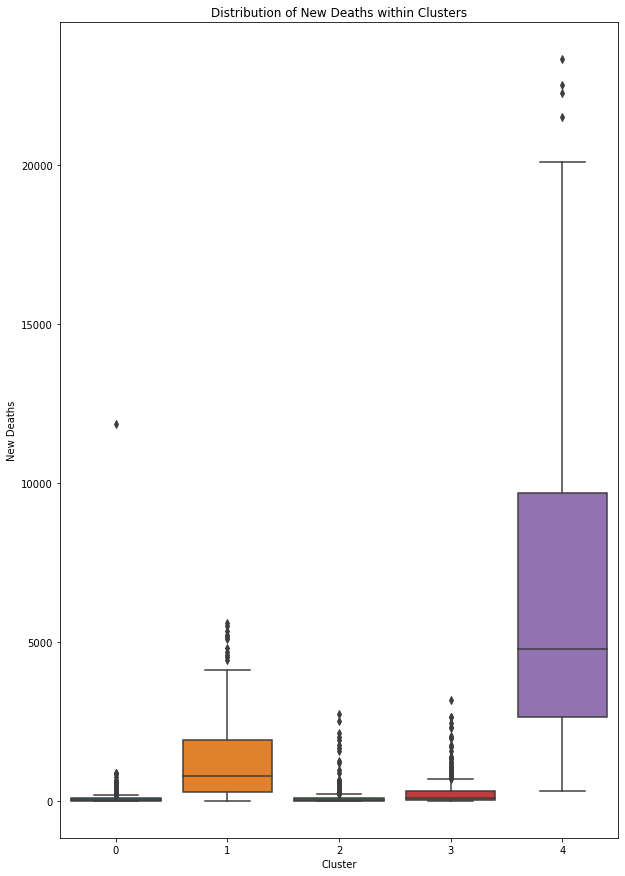

count         mean          std    min     25%     50%     75%  \
Cluster                                                                   
0        703.0    84.578947   459.297264    0.0     6.0    21.0    79.5   
1        251.0  1235.003984  1313.348427    3.0   272.5   763.0  1902.5   
2        207.0   180.159420   430.971356    0.0     3.0    26.0    85.0   
3        681.0   237.328928   384.050840    0.0    21.0    72.0   292.0   
4        165.0  6830.806061  5438.687551  305.0  2642.0  4776.0  9678.0   

             max  
Cluster           
0        11858.0  
1         5602.0  
2         2732.0  
3         3157.0  
4        23312.0

In [41]:
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 15))

sns.boxplot(x='Cluster', y='new_deaths', data=df)

plt.title('Distribution of New Deaths within Clusters')
plt.xlabel('Cluster')
plt.ylabel('New Deaths')
plt.show()

cluster_summary = df.groupby('Cluster')['new_deaths'].describe()
cluster_summary


Cluster 0 has the highest count of data points, but its mean and maximum new_deaths are lower than some other clusters.

Cluster 1 has the lowest mean and a smaller count, indicating that it generally represents areas or times with fewer new deaths.

Cluster 2 shows a higher mean and standard deviation, which corresponds to the wider distribution.

Cluster 3 has the highest mean by a significant margin, and the maximum value in this cluster is the largest in the dataset, indicating this cluster includes the most severe instances in terms of new deaths.

Cluster 4 has a low mean, similar to Clusters 0 and 1, but includes a very high maximum value due to outliers.

In [42]:
# temporal patterns
df['date'] = pd.to_datetime(df['date'])
cluster_temporal_patterns = df.groupby('Cluster')['date'].agg(['min', 'max'])

# geographical patterns
cluster_geographical_patterns = df.groupby(['Cluster', 'location']).size().reset_index(name='count')

# healthcare capacity
cluster_healthcare_capacity = df.groupby('Cluster')['icu_patients_per_million', 'hosp_patients_per_million'].mean()

# public health interventions
cluster_public_health_interventions = df.groupby('Cluster')['stringency_index'].mean()

# vaccination rates
cluster_vaccination_rates = df.groupby('Cluster')['people_fully_vaccinated_per_hundred'].mean()

# demographic and socioeconomic factors
cluster_demographics = df.groupby('Cluster')['median_age', 'population_density', 'gdp_per_capita'].mean()


/var/folders/wd/1wgl396j6ddcxnk20n91fc840000gn/T/ipykernel_41367/378924622.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_healthcare_capacity = df.groupby('Cluster')['icu_patients_per_million', 'hosp_patients_per_million'].mean()
/var/folders/wd/1wgl396j6ddcxnk20n91fc840000gn/T/ipykernel_41367/378924622.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_demographics = df.groupby('Cluster')['median_age', 'population_density', 'gdp_per_capita'].mean()


Takeaways from Cluster Analysis: 

- Cluster 0:
    - Spans the entire date range, suggesting that this cluster may represent general trends over the course of the pandemic. 
    - Has lower ICU and hospital patients per million, which might indicate lower pressure on healthcare resources.
    - Has lower stringency index values, which could correlate with fewer restrictions or public health interventions.
    - Has the highest rate of fully vaccinated people, which might be associated with lower mortality if vaccinations are effective.
    - Has higher median age and GDP per capita, which might suggest wealthier and older population.

- Cluster 1:
    - Spans the entire date range, suggesting that this cluster may represent general trends over the course of the pandemic. 
    - Has the lowest healthcare capacity usage, which could correlate with lower rates of new deaths.
    - Has a slightly higher stringency index than Clusters 0 and 4, potentially indicating more stringent public health measures.
    - Has moderate vaccination rates.
    - Has the lowest median age and population density, which could indicate younger populations that might be less affected by COVID-19 or different testing/reporting rates.

- Cluster 2:
    - Has a narrower date range, ending in March 2022, which might represent a specific wave or period within the pandemic.
    - Shows significantly higher healthcare capacity usage, suggesting severe outbreaks.
    - Has the highest stringency index, which may reflect stricter lockdown measures or responses to severe outbreaks.
    - Has the lowest vaccination rates, which may have contributed to higher hospitalization and ICU rates.
    - Has higher median age and GDP per capita, which might suggest wealthier and older population.

- Cluster 3: 
    - Ends in May 2023, which could indicate a period with distinct characteristics separate from the general trends.
    - Exclusively made up of USA data.
    - Has moderate ICU usage but lower hospitalization rates than Cluster 2, which could be due to different healthcare practices, population health, or availability of healthcare resources in the United States.
    - Has a stringency index similar to Cluster 1, which might suggest similar public health policies or responses.
    - Has a lower vaccination rate than Cluster 0, which may be a factor in its higher rate of new deaths.as a high GDP per capita, consistent with the U.S., but a lower median age, which could suggest a wider spread among a younger population.

- Cluster 4: 
    - Spans the entire date range, suggesting that this cluster may represent general trends over the course of the pandemic. 
    - Has lower ICU and hospital patients per million, which might indicate lower pressure on healthcare resources.
    - Has lower stringency index values, which could correlate with fewer restrictions or public health interventions.
    - Has moderate vaccination rates.
    - Has a median range for demographic and socioeconomic factors, indicating a diverse representation.

# Temporal Visualization 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates

time = data[['new_deaths','location', 'date']]
type(time)

pandas.core.frame.DataFrame

/var/folders/wd/1wgl396j6ddcxnk20n91fc840000gn/T/ipykernel_41367/3946026173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['date'] = pd.to_datetime(time['date'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<class 'pandas.core.frame.DataFrame'>


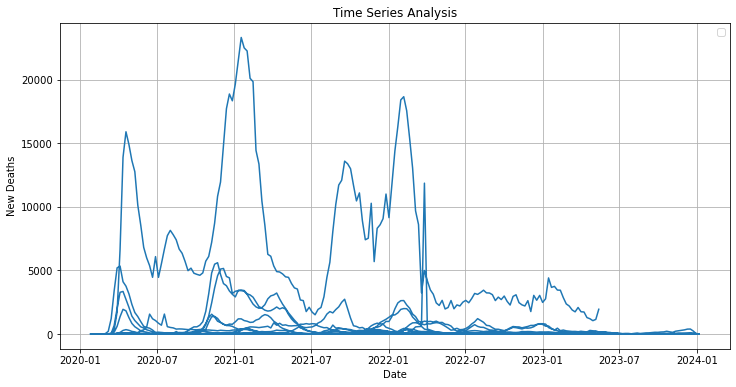

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'date' column is not in datetime format, convert it
time['date'] = pd.to_datetime(time['date'])

# Convert 'date' and 'new_deaths' columns to NumPy arrays
date_array = time['date'].to_numpy()
new_deaths_array = time['new_deaths'].to_numpy()

# Confirm the type of the 'time' DataFrame
print(type(time))

# Perform time series analysis using NumPy arrays
plt.figure(figsize=(12, 6))
plt.plot(date_array, new_deaths_array)  # Assuming there's only one location for simplicity
plt.title(f'Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/wd/1wgl396j6ddcxnk20n91fc840000gn/T/ipykernel_41367/3542778006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['date'] = pd.to_datetime(time['date'])


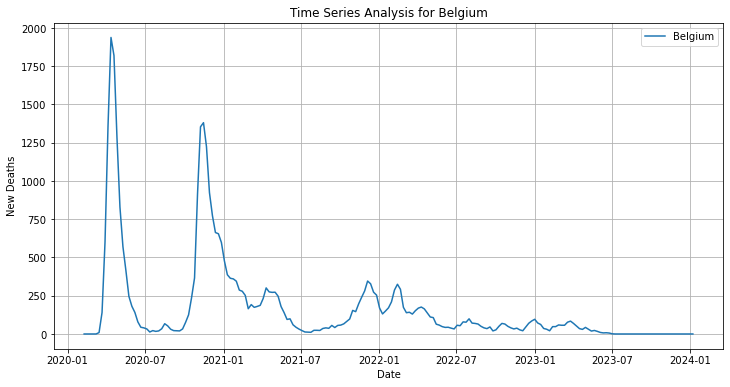

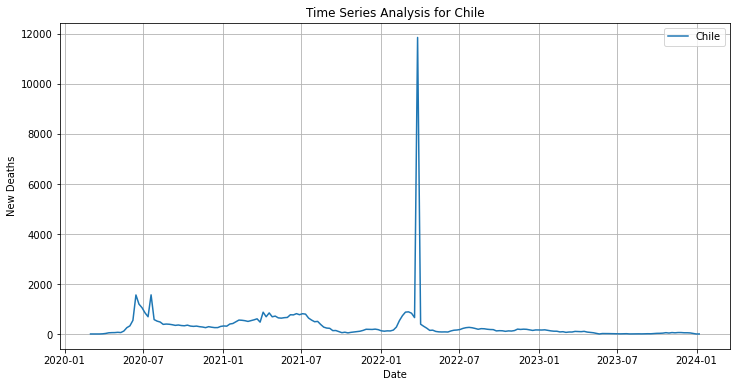

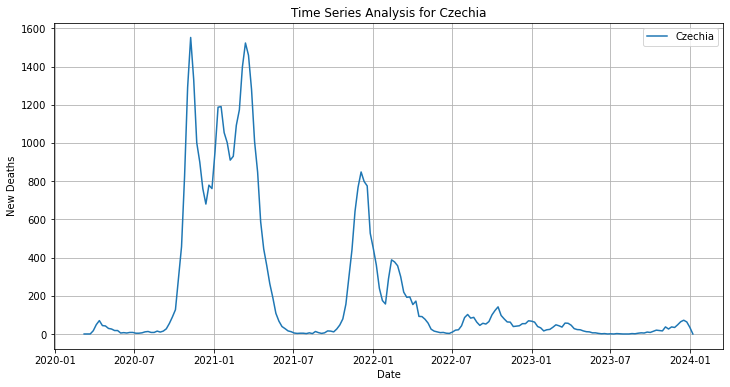

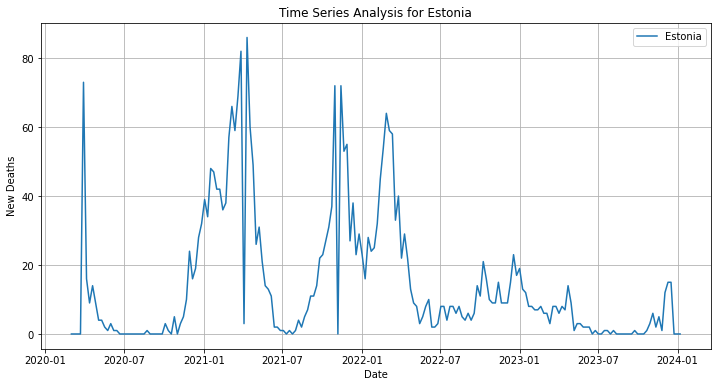

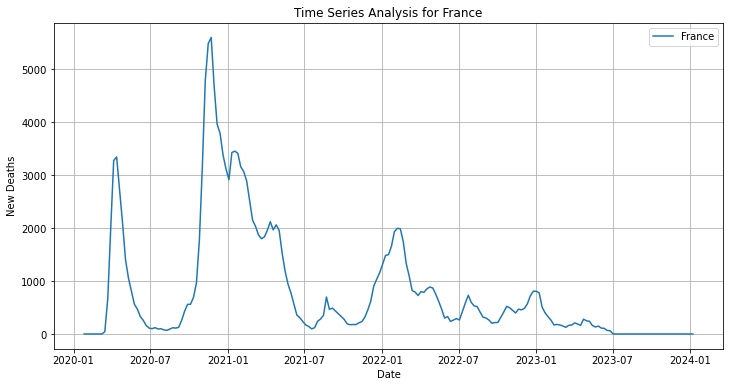

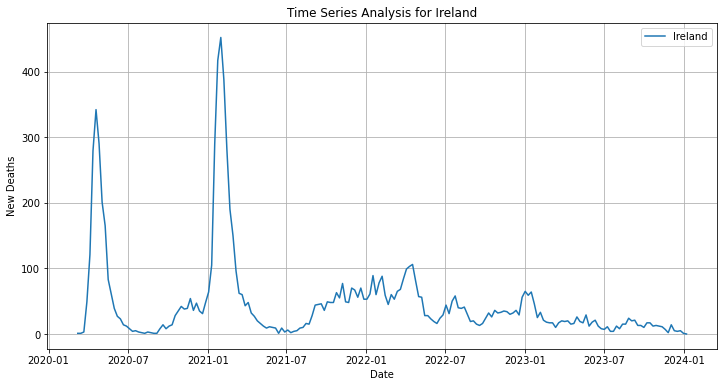

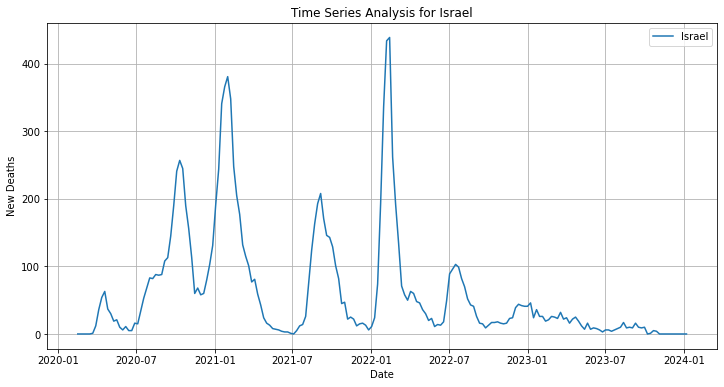

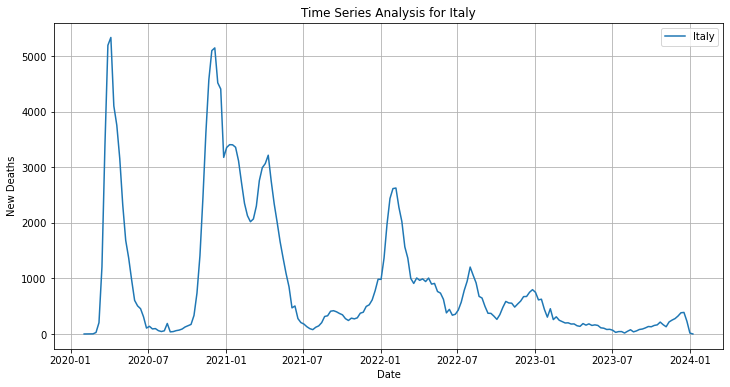

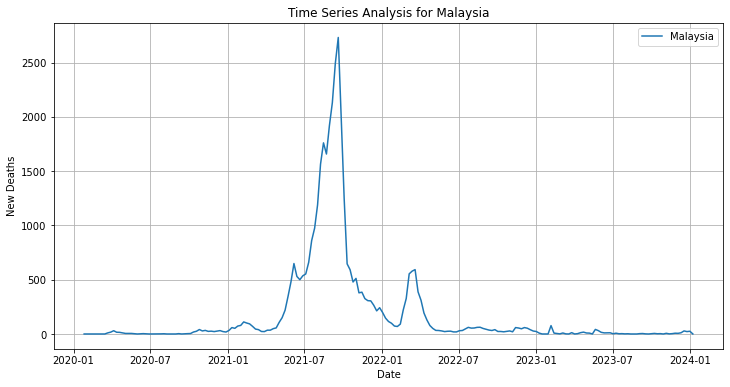

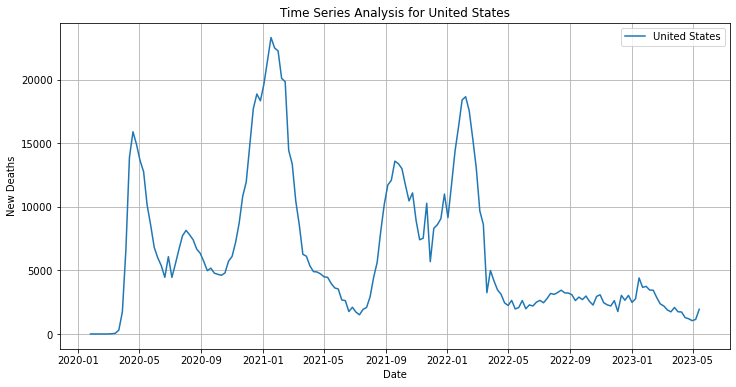

In [45]:
# Assuming 'date' column is not in datetime format, convert it
time['date'] = pd.to_datetime(time['date'])

# Get a sample of 10 unique countries for simplicity
countries = time['location'].unique()[:10]


for country in countries:
    # Subset data for the current country
    country_data = time[time['location'] == country]

    # Convert 'date' and 'new_deaths' columns to NumPy arrays
    date_array = country_data['date'].to_numpy()
    new_deaths_array = country_data['new_deaths'].to_numpy()

    # Basic time series analysis
    plt.figure(figsize=(12, 6))
    plt.plot(date_array, new_deaths_array, label=country)
    plt.title(f'Time Series Analysis for {country}')
    plt.xlabel('Date')
    plt.ylabel('New Deaths')
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'icu_patients_per_million', 'hosp_patients_per_million',
       'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million', 'tests_units', 'new_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'population', 'excess_mortality', 'Cluster'],
      dtype='object')

Text(0, 0.5, 'New Deaths')

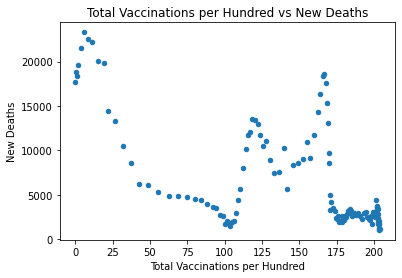

In [47]:
US_df = df[df['location'] == 'United States']
US_df.plot(x='total_vaccinations_per_hundred', y='new_deaths', legend=False, kind='scatter')
plt.title('Total Vaccinations per Hundred vs New Deaths')
plt.xlabel('Total Vaccinations per Hundred')
plt.ylabel('New Deaths')

# Feature Engineering

In [48]:
! pip install --upgrade holidays

^C
ERROR: Operation cancelled by user


In [49]:
import holidays
import datetime

In [50]:
## Shifting by 1, 2, 4 weeks
df['new_deaths_1_week_lag'] = df['new_deaths'].shift(1)
df['new_deaths_2_week_lag'] = df['new_deaths'].shift(2)
df['new_deaths_4_week_lag'] = df['new_deaths'].shift(4)

# df['new_deaths_1_week_mean'] = df['new_deaths'].rolling(window=1).mean()
df['new_deaths_2_week_mean'] = df['new_deaths'].rolling(window=2).mean()
df['new_deaths_4_week_mean'] = df['new_deaths'].rolling(window=4).mean()

# df['new_deaths_1_week_std'] = df['new_deaths'].rolling(window=1).std()
df['new_deaths_2_week_std'] = df['new_deaths'].rolling(window=2).std()
df['new_deaths_4_week_std'] = df['new_deaths'].rolling(window=4).std()

# df['new_deaths_1_week_max'] = df['new_deaths'].rolling(window=1).max()
df['new_deaths_2_week_max'] = df['new_deaths'].rolling(window=2).max()
df['new_deaths_4_week_max'] = df['new_deaths'].rolling(window=4).max()

# df['new_deaths_1_week_min'] = df['new_deaths'].rolling(window=1).min()
df['new_deaths_2_week_min'] = df['new_deaths'].rolling(window=2).min()
df['new_deaths_4_week_min'] = df['new_deaths'].rolling(window=4).min()

## Other time series features
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(np.int64)
df['season'] = df['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or 
                                      x.month == 2 else 'Spring' if  x.month == 3 or 
                                      x.month == 4 or x.month == 5 else 'Summer' if  
                                      x.month == 6 or x.month == 7 or 
                                      x.month == 8 else 'Autumn' if  
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')
df['holidays'] = df['date'].apply( lambda x: 'Holiday' if x in holidays.US() 
                                      else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)

## Comparing each value with its previous value
df['comparison_with_previous'] = df['new_deaths'] - df['new_deaths'].shift(1)

## Growth rate of Cases & Deaths
df['growth_rate_cases'] = df['total_cases'].pct_change().multiply(100)
df['growth_rate_deaths'] = original_data['total_deaths'].pct_change().multiply(100)

## Healthcare Capacity (Calculate ICU utilization ratio per thousand beds) ;;;make sure to check for zeros and fill in NaNs
df['icu_utilization_ratio'] = df['icu_patients_per_million'] / (df['hospital_beds_per_thousand'] * 10)

## Healthcare Strain 
df['healthcare_strain_index'] = (df['icu_patients_per_million'] + df['hosp_patients_per_million']) / df['hospital_beds_per_thousand']

## Elderly cases ratio
df['elderly_to_cases_ratio'] = df['aged_65_older'] / df['total_cases_per_million']

## Cumulative (count of the number of times a location had new cases exceed a certain threshold)
df['cumulative_cases_threshold'] = (df['new_cases'] > threshold).cumsum()

## Interaction term between gdp and stringency (economic impact of policy)
df['gdp_stringency_interaction'] = df['gdp_per_capita'] * df['stringency_index']

df

iso_code      continent       location       date  total_cases  \
24345       BEL         Europe        Belgium 2020-02-09          1.0   
24346       BEL         Europe        Belgium 2020-02-16          1.0   
24347       BEL         Europe        Belgium 2020-02-23          1.0   
24348       BEL         Europe        Belgium 2020-03-01          1.0   
24355       BEL         Europe        Belgium 2020-03-08        316.0   
...         ...            ...            ...        ...          ...   
261106      USA  North America  United States 2023-04-16  103081453.0   
261113      USA  North America  United States 2023-04-23  103179920.0   
261120      USA  North America  United States 2023-04-30  103266404.0   
261127      USA  North America  United States 2023-05-07  103343569.0   
261134      USA  North America  United States 2023-05-14  103436829.0   

        new_cases  new_deaths  total_cases_per_million  new_cases_per_million  \
24345         1.0         0.0                    0.086                  0.086   
24346         0.0         0.0                    0.086                  0.000   
24347         0.0         0.0                    0.086                  0.000   
24348         0.0         0.0                    0.086                  0.000   
24355       315.0         0.0                   27.111                 27.025   
...           ...         ...                      ...                    ...   
261106   104057.0      1290.0               304713.402                307.597   
261113    98467.0      1198.0               305004.475                291.073   
261120    86484.0      1046.0               305260.126                255.651   
261127    77165.0      1146.0               305488.229                228.103   
261134    93260.0      1943.0               305763.910                275.681   

        icu_patients_per_million  ...  month_sin     month_cos  \
24345                        NaN  ...   0.866025  5.000000e-01   
24346                        NaN  ...   0.866025  5.000000e-01   
24347                        NaN  ...   0.866025  5.000000e-01   
24348                        NaN  ...   1.000000  6.123234e-17   
24355                      0.000  ...   1.000000  6.123234e-17   
...                          ...  ...        ...           ...   
261106                     4.662  ...   0.866025 -5.000000e-01   
261113                     3.825  ...   0.866025 -5.000000e-01   
261120                     3.589  ...   0.866025 -5.000000e-01   
261127                     3.258  ...   0.500000 -8.660254e-01   
261134                     2.918  ...   0.500000 -8.660254e-01   

        comparison_with_previous growth_rate_cases  growth_rate_deaths  \
24345                        NaN               NaN            0.000000   
24346                        0.0          0.000000            0.000000   
24347                        0.0          0.000000            0.000000   
24348                        0.0          0.000000            0.000000   
24355                        0.0      31500.000000            0.000000   
...                          ...               ...                 ...   
261106                    -439.0          0.101048            0.115124   
261113                     -92.0          0.095523            0.106791   
261120                    -152.0          0.083819            0.093142   
261127                     100.0          0.074724            0.101952   
261134                     797.0          0.090243            0.172679   

        icu_utilization_ratio  healthcare_strain_index  \
24345                     NaN                      NaN   
24346                     NaN                      NaN   
24347                     NaN                      NaN   
24348                     NaN                      NaN   
24355                0.000000                 0.000000   
...                       ...                      ...   
261106               0.168303                14.220217   
261113     

0.07835110029052729
0.10261695654343381


<AxesSubplot:xlabel='month_sin', ylabel='new_deaths'>

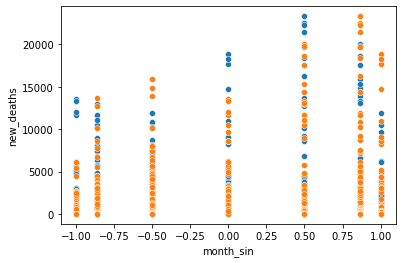

In [51]:
# cyclical encoding for month and correlation with target
print(df['new_deaths'].corr(df['month_sin']))
sns.scatterplot(data = df, x = 'month_sin', y = 'new_deaths')

print(df['new_deaths'].corr(df['month_cos']))
sns.scatterplot(data = df, x = 'month_cos', y = 'new_deaths')

In [52]:
# one-hot encoding for holidays
dummy_holidays = pd.get_dummies(df['holidays'])
df = df.drop('holidays',axis = 1)
df = df.join(dummy_holidays)

## EDA of new features

In [53]:
features_and_target = df[['new_deaths', 'new_deaths_1_week_lag', 'new_deaths_2_week_lag', 'new_deaths_4_week_lag',
                          'new_deaths_2_week_mean', 'new_deaths_4_week_mean','new_deaths_2_week_std', 
                          'new_deaths_4_week_std',
                          'new_deaths_2_week_max', 'new_deaths_4_week_max',
                          'new_deaths_2_week_min', 'new_deaths_4_week_min',
                          'quarter','month','year', 'dayofyear','dayofmonth', 'weekofyear',
                          'season', 'Holiday', 'Normal day', 'comparison_with_previous', 'growth_rate_cases', 
                          'growth_rate_deaths', 'icu_utilization_ratio', 'healthcare_strain_index',
                          'elderly_to_cases_ratio', 'cumulative_cases_threshold', 'gdp_stringency_interaction',
                          'month_sin', 'month_cos']]

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'total_cases'}>,
        <AxesSubplot:title={'center':'new_cases'}>,
        <AxesSubplot:title={'center':'new_deaths'}>,
        <AxesSubplot:title={'center':'total_cases_per_million'}>],
       [<AxesSubplot:title={'center':'new_cases_per_million'}>,
        <AxesSubplot:title={'center':'icu_patients_per_million'}>,
        <AxesSubplot:title={'center':'hosp_patients_per_million'}>,
        <AxesSubplot:title={'center':'weekly_icu_admissions_per_million'}>,
        <AxesSubplot:title={'center':'weekly_hosp_admissions_per_million'}>],
       [<AxesSubplot:title={'center':'new_vaccinations'}>,
        <AxesSubplot:title={'center':'total_vaccinations_per_hundred'}>,
        <AxesSubplot:title={'center':'people_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'stringency_index'}>],
       [<AxesSubplot:title={'cen

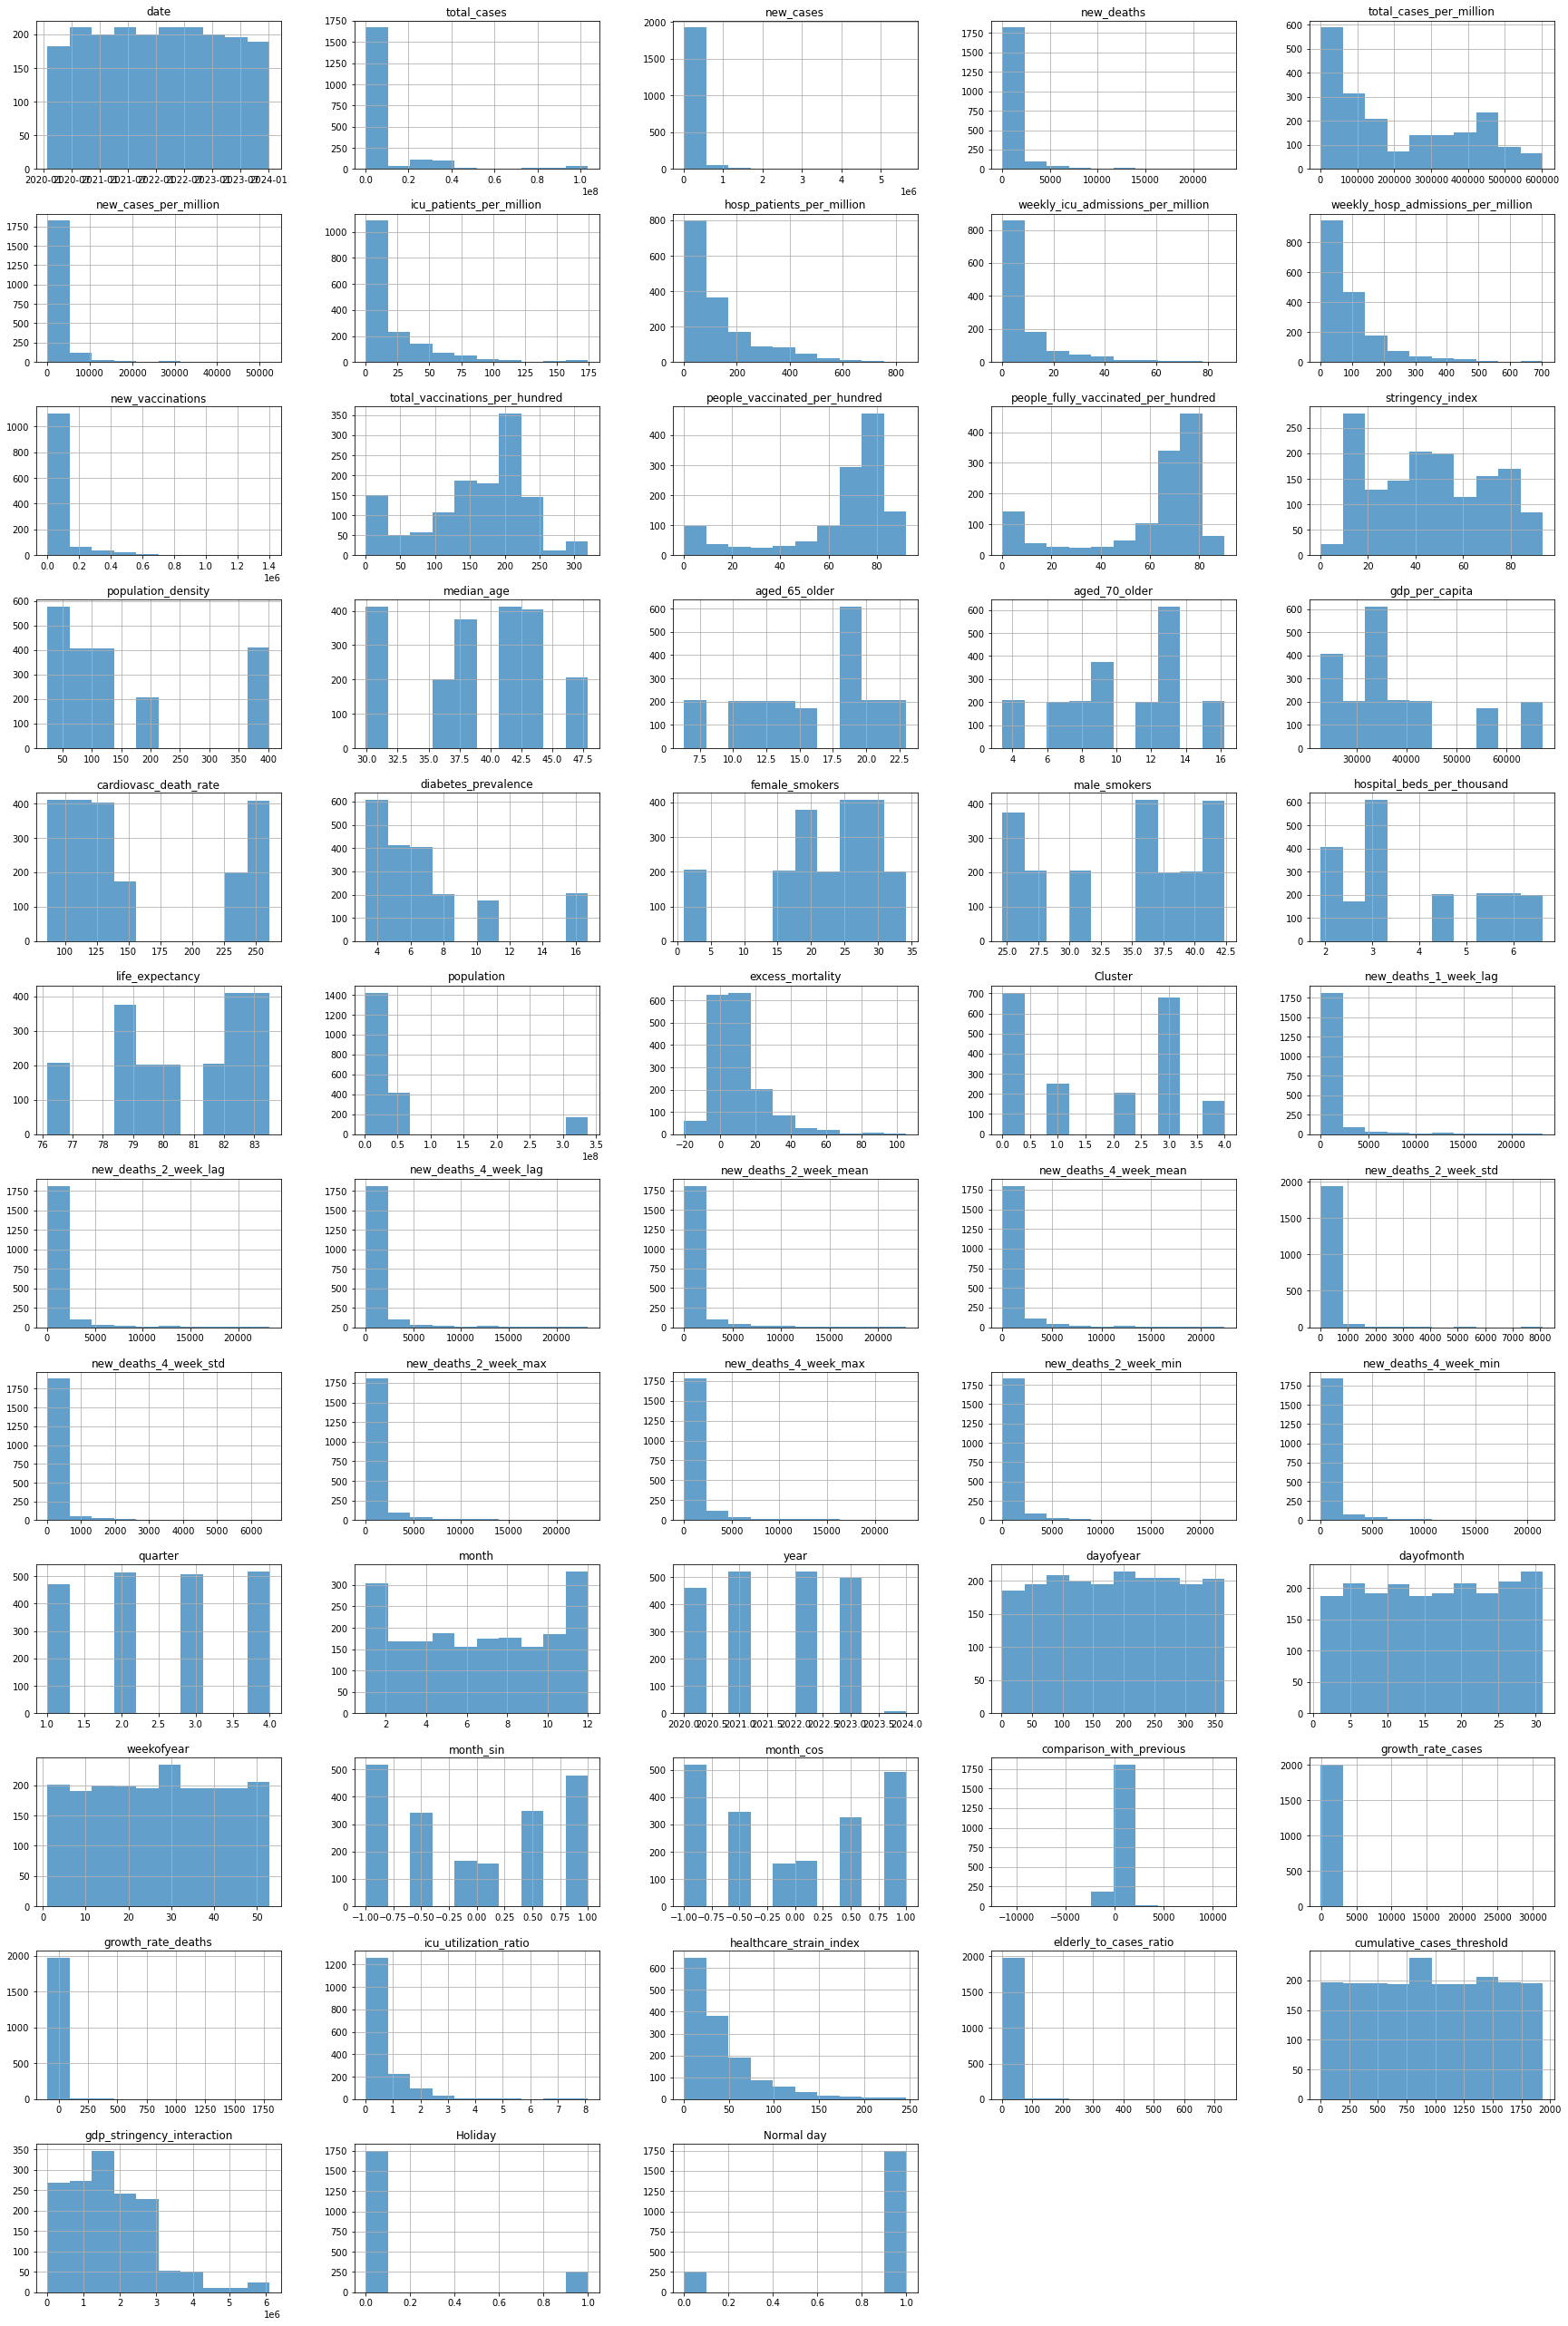

In [54]:
df.hist(figsize=(30,50), layout=(13,5), alpha=0.7)


<AxesSubplot:xlabel='season', ylabel='count'>

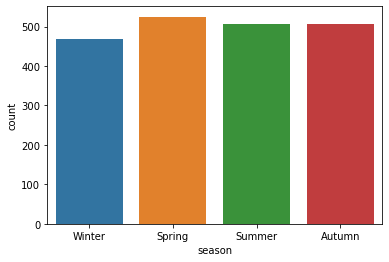

In [55]:
sns.countplot( x = 'season', data = df)

<AxesSubplot:xlabel='Holiday', ylabel='count'>

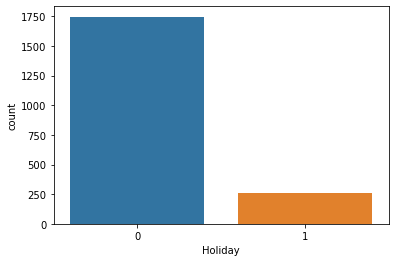

In [56]:
sns.countplot(x = 'Holiday', data = df)

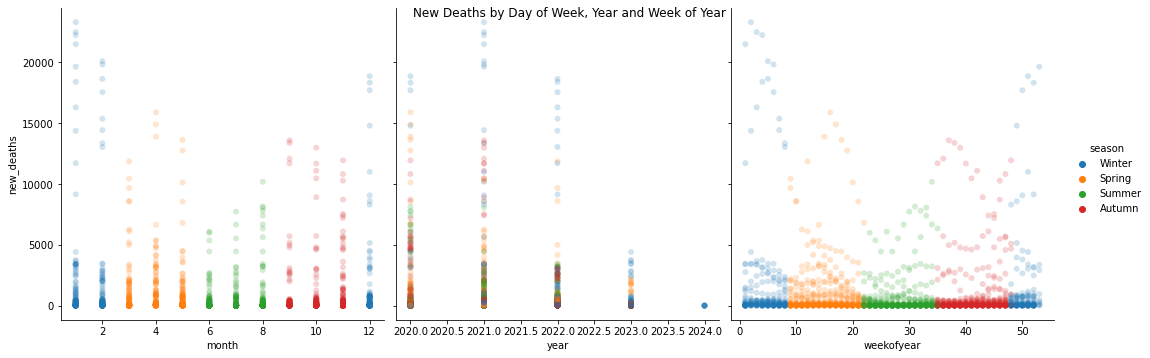

In [57]:
sns.pairplot(df,
             hue='season',
             x_vars=['month','year','weekofyear'],
             y_vars='new_deaths',
             height=5,
             plot_kws={'alpha':0.20, 'linewidth':0})
plt.suptitle('New Deaths by Day of Week, Year and Week of Year')
plt.show()

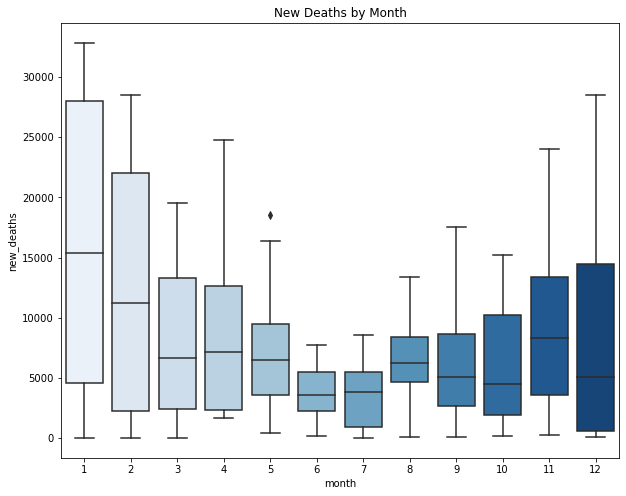

In [58]:
aggregated_df = df[['date','new_deaths']].groupby('date').sum()
aggregated_df['month'] = aggregated_df.index.month
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=aggregated_df, x='month', y='new_deaths', palette='Blues')
ax.set_title('New Deaths by Month')
plt.show()

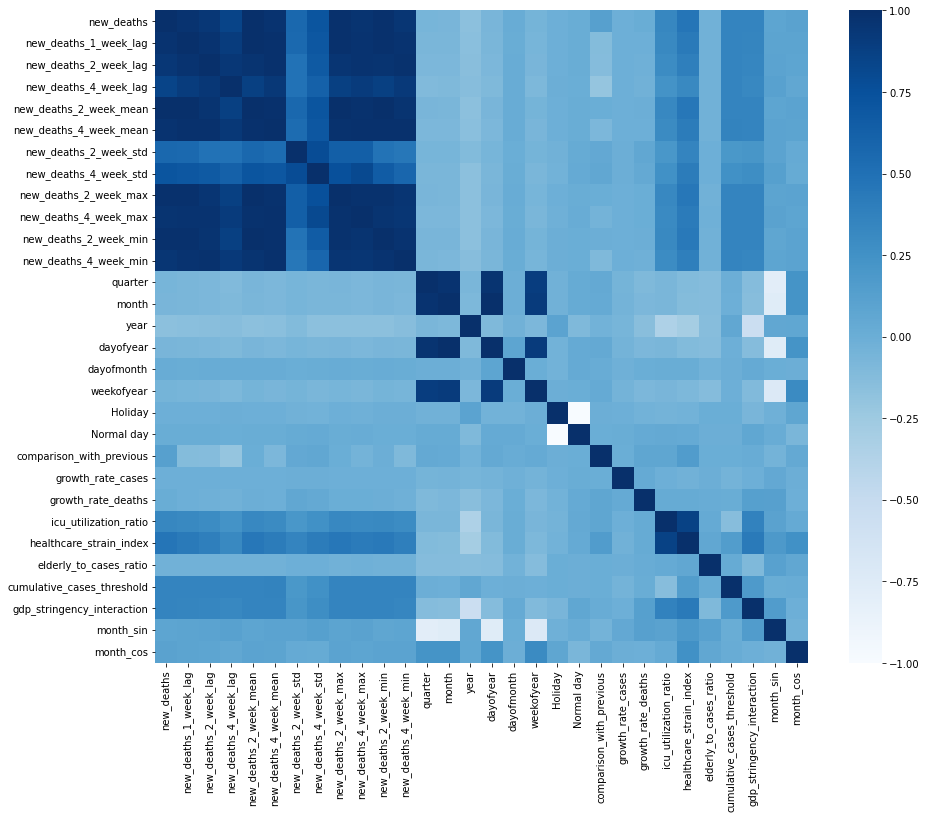

In [59]:
corrmat = features_and_target.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap="Blues", square=True);

In [60]:
correlation_matrix = features_and_target.corr()['new_deaths'].drop('new_deaths')
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)
sorted_correlations

new_deaths_2_week_mean        0.993095
new_deaths_2_week_max         0.989840
new_deaths_2_week_min         0.987420
new_deaths_1_week_lag         0.972474
new_deaths_4_week_mean        0.971850
new_deaths_4_week_max         0.965151
new_deaths_4_week_min         0.949625
new_deaths_2_week_lag         0.942462
new_deaths_4_week_lag         0.850252
new_deaths_4_week_std         0.715774
new_deaths_2_week_std         0.569891
healthcare_strain_index       0.462350
cumulative_cases_threshold    0.356804
gdp_stringency_interaction    0.356585
icu_utilization_ratio         0.330798
year                          0.163250
comparison_with_previous      0.117400
month_cos                     0.102617
month_sin                     0.078351
month                         0.065718
dayofyear                     0.062856
quarter                       0.061247
weekofyear                    0.048872
elderly_to_cases_ratio        0.025597
dayofmonth                    0.019430
Normal day               

<AxesSubplot:xlabel='new_deaths_2_week_mean', ylabel='Count'>

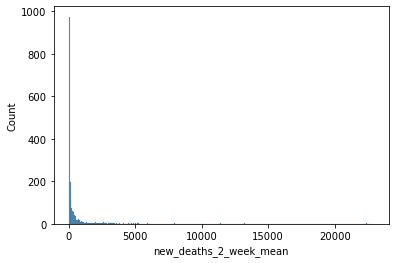

In [61]:
sns.histplot( df['new_deaths_2_week_mean'], kde=False )

<AxesSubplot:xlabel='new_deaths_2_week_mean', ylabel='new_deaths'>

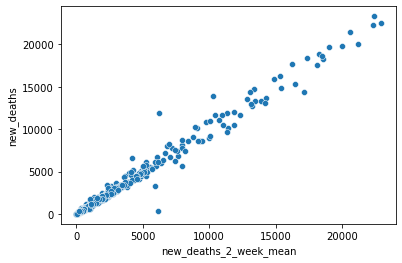

In [62]:
sns.scatterplot(data = features_and_target, x = 'new_deaths_2_week_mean', y = 'new_deaths')

<AxesSubplot:xlabel='new_deaths_2_week_max', ylabel='Count'>

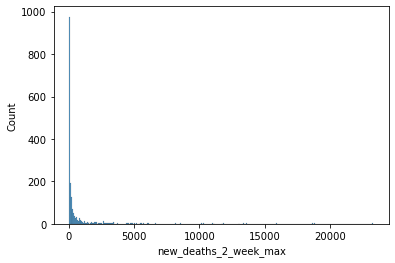

In [63]:
sns.histplot( df['new_deaths_2_week_max'], kde=False )

<AxesSubplot:xlabel='new_deaths_2_week_max', ylabel='new_deaths'>

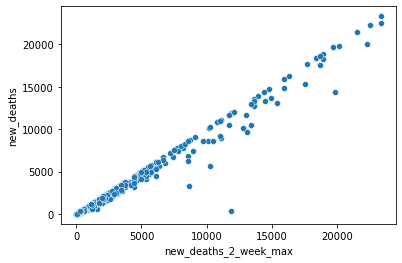

In [64]:
sns.scatterplot(data = features_and_target, x = 'new_deaths_2_week_max', y = 'new_deaths')

<AxesSubplot:xlabel='new_deaths_2_week_min', ylabel='Count'>

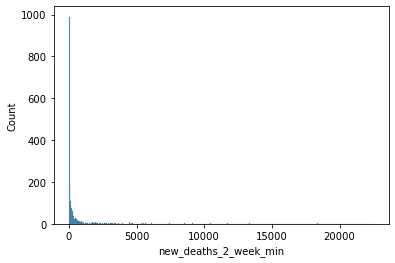

In [65]:
sns.histplot( df['new_deaths_2_week_min'], kde=False )

<AxesSubplot:xlabel='new_deaths_2_week_min', ylabel='new_deaths'>

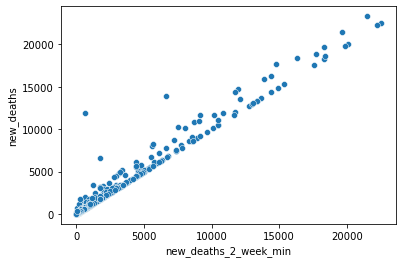

In [66]:
sns.scatterplot(data = features_and_target, x = 'new_deaths_2_week_min', y = 'new_deaths')

## Feature Selection

In [67]:
full_correlation_matrix = df.corr()['new_deaths'].drop('new_deaths')
full_sorted_correlations = full_correlation_matrix.abs().sort_values(ascending=False)
full_sorted_correlations.head(12)

new_deaths_2_week_mean    0.993095
new_deaths_2_week_max     0.989840
new_deaths_2_week_min     0.987420
new_deaths_1_week_lag     0.972474
new_deaths_4_week_mean    0.971850
new_deaths_4_week_max     0.965151
new_deaths_4_week_min     0.949625
new_deaths_2_week_lag     0.942462
new_deaths_4_week_lag     0.850252
new_deaths_4_week_std     0.715774
population                0.711513
new_cases                 0.642166
Name: new_deaths, dtype: float64

In [68]:
# drop all features with corr < 0.1
#month_cos                     0.102617
#month_sin                     0.078351
#month                         0.065718
#dayofyear                     0.062856
#quarter                       0.061247
#weekofyear                    0.048872
#elderly_to_cases_ratio        0.025597
#dayofmonth                    0.019430
#growth_rate_cases             0.009985
#growth_rate_deaths            0.009008


columns_to_drop = [
    'month_cos', 'month_sin', 'month', 
    'dayofyear', 'quarter', 'weekofyear', 
    'elderly_to_cases_ratio', 'dayofmonth', 
    'growth_rate_cases', 'growth_rate_deaths'
]

df = df.drop(columns=columns_to_drop)
df


iso_code      continent       location       date  total_cases  \
24345       BEL         Europe        Belgium 2020-02-09          1.0   
24346       BEL         Europe        Belgium 2020-02-16          1.0   
24347       BEL         Europe        Belgium 2020-02-23          1.0   
24348       BEL         Europe        Belgium 2020-03-01          1.0   
24355       BEL         Europe        Belgium 2020-03-08        316.0   
...         ...            ...            ...        ...          ...   
261106      USA  North America  United States 2023-04-16  103081453.0   
261113      USA  North America  United States 2023-04-23  103179920.0   
261120      USA  North America  United States 2023-04-30  103266404.0   
261127      USA  North America  United States 2023-05-07  103343569.0   
261134      USA  North America  United States 2023-05-14  103436829.0   

        new_cases  new_deaths  total_cases_per_million  new_cases_per_million  \
24345         1.0         0.0                    0.086                  0.086   
24346         0.0         0.0                    0.086                  0.000   
24347         0.0         0.0                    0.086                  0.000   
24348         0.0         0.0                    0.086                  0.000   
24355       315.0         0.0                   27.111                 27.025   
...           ...         ...                      ...                    ...   
261106   104057.0      1290.0               304713.402                307.597   
261113    98467.0      1198.0               305004.475                291.073   
261120    86484.0      1046.0               305260.126                255.651   
261127    77165.0      1146.0               305488.229                228.103   
261134    93260.0      1943.0               305763.910                275.681   

        icu_patients_per_million  ...  new_deaths_4_week_min  year  season  \
24345                        NaN  ...                    NaN  2020  Winter   
24346                        NaN  ...                    NaN  2020  Winter   
24347                        NaN  ...                    NaN  2020  Winter   
24348                        NaN  ...                    0.0  2020  Spring   
24355                      0.000  ...                    0.0  2020  Spring   
...                          ...  ...                    ...   ...     ...   
261106                     4.662  ...                 1290.0  2023  Spring   
261113                     3.825  ...                 1198.0  2023  Spring   
261120                     3.589  ...                 1046.0  2023  Spring   
261127                     3.258  ...                 1046.0  2023  Spring   
261134                     2.918  ...                 1046.0  2023  Spring   

       comparison_with_previous  icu_utilization_ratio  \
24345                       NaN                    NaN   
24346                       0.0                    NaN   
24347                       0.0                    NaN   
24348                       0.0                    NaN   
24355                       0.0               0.000000   
...                         ...                    ...   
261106                   -439.0               0.168303   
261113                    -92.0               0.138087   
261120                   -152.0               0.129567   
261127                    100.0               0.117617   
261134                    797.0               0.105343   

        healthcare_strain_index  cumulative_cases_threshold  \
24345                       NaN                           1   
24346                       NaN                           1   
24347                       NaN                           1   
24348                       NaN                           1   
24355                  0.000000                           2   
...                         ...                         ...   
261106                14.220217                        1934   
261113             

It takes 12 features to get to an original feature of the dataset

In [69]:
! conda install lightgbm

^C

CondaError: KeyboardInterrupt



In [70]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X = df.drop(['new_deaths', 'iso_code','date'], axis=1)
X = pd.get_dummies(X)
y = df['new_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature_name, importance in feature_importances:
    print(f"{feature_name}: {importance}")

comparison_with_previous: 448
new_deaths_2_week_max: 268
new_deaths_2_week_min: 263
new_deaths_2_week_mean: 239
new_deaths_2_week_std: 155
new_deaths_4_week_lag: 153
new_cases: 149
new_deaths_4_week_std: 120
new_cases_per_million: 100
new_deaths_4_week_max: 99
total_vaccinations_per_hundred: 90
new_deaths_4_week_min: 76
weekly_hosp_admissions_per_million: 71
new_deaths_1_week_lag: 66
new_deaths_2_week_lag: 64
new_deaths_4_week_mean: 58
hosp_patients_per_million: 56
excess_mortality: 55
new_vaccinations: 54
icu_patients_per_million: 47
weekly_icu_admissions_per_million: 46
people_vaccinated_per_hundred: 45
healthcare_strain_index: 41
total_cases: 34
icu_utilization_ratio: 30
gdp_stringency_interaction: 29
people_fully_vaccinated_per_hundred: 26
total_cases_per_million: 25
cumulative_cases_threshold: 21
stringency_index: 14
population: 11
tests_units_people tested: 9
cardiovasc_death_rate: 8
female_smokers: 6
population_density: 3
median_age: 3
aged_65_older: 3
diabetes_prevalence: 3
hos

In [71]:
features_to_drop = [feature_name for feature_name, importance in feature_importances if importance == 0]
print(len(features_to_drop))
feature_names = feature_names.drop(features_to_drop, errors='ignore')
print(len(feature_names))

22
44


# Model Building

## Univariate

In [72]:
# from pandas.plotting import autocorrelation_plot

# # make univariate_df_malaysia a series
# univariate_df_Malaysia
# autocorrelation_plot(univariate_df_Malaysia)
# pyplot.show()

In [73]:
# from statsmodels.tsa.arima.model import ARIMA


# # to_period weekly
# series = univariate_df_Malaysia
# series.index = series.index.to_period('W')
# # fit model
# model = ARIMA(series, order=(10,1,1))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

In [98]:
#univarate datasets

aggregated_univariate_df = df[['date','new_deaths']].groupby('date').sum()

univariate_df = df[['date','new_deaths','location']]
univariate_df_United_States = univariate_df[univariate_df['location'] == 'United States'].drop('location', axis=1)
univariate_df_Belgium = univariate_df[univariate_df['location'] == 'Belgium'].drop('location', axis=1)
univariate_df_Chile = univariate_df[univariate_df['location'] == 'Chile'].drop('location', axis=1)
univariate_df_Czechia = univariate_df[univariate_df['location'] == 'Czechia'].drop('location', axis=1)
univariate_df_Malaysia = univariate_df[univariate_df['location'] == 'Malaysia'].drop('location', axis=1)
univariate_df_Italy = univariate_df[univariate_df['location'] == 'Italy'].drop('location', axis=1)
univariate_df_Israel = univariate_df[univariate_df['location'] == 'Israel'].drop('location', axis=1)
univariate_df_Ireland = univariate_df[univariate_df['location'] == 'Ireland'].drop('location', axis=1)
univariate_df_France = univariate_df[univariate_df['location'] == 'France'].drop('location', axis=1)
univariate_df_Estonia = univariate_df[univariate_df['location'] == 'Estonia'].drop('location', axis=1)

In [109]:
#univarate datasets
univariate_df_United_States = univariate_df_United_States[univariate_df_United_States['date'] >= '2020-03-01']
print(univariate_df_United_States.shape)

univariate_df_Belgium = univariate_df_Belgium[univariate_df_Belgium['date'] >= '2020-03-01']
print(univariate_df_Belgium.shape)

univariate_df_Chile = univariate_df_Chile[univariate_df_Chile['date'] >= '2020-03-01']
print(univariate_df_Chile.shape)

univariate_df_Czechia = univariate_df_Czechia[univariate_df_Czechia['date'] >= '2020-03-01'] 
print(univariate_df_Czechia.shape)

univariate_df_Malaysia  = univariate_df_Malaysia[univariate_df_Malaysia ['date'] >= '2020-03-01']
print(univariate_df_Malaysia .shape)

univariate_df_Italy = univariate_df_Italy[univariate_df_Italy['date'] >= '2020-03-01']
print(univariate_df_Italy.shape)

univariate_df_Israel = univariate_df_Israel[univariate_df_Israel['date'] >= '2020-03-01']
print(univariate_df_Israel.shape)

univariate_df_Ireland = univariate_df_Ireland[univariate_df_Ireland['date'] >= '2020-03-01']
print(univariate_df_Ireland.shape)

univariate_df_France = univariate_df_France[univariate_df_France['date'] >= '2020-03-01']
print(univariate_df_France.shape)

estonia_diff = univariate_df_Estonia[univariate_df_Estonia ['date'] >= '2020-03-01']
print(univariate_df_Estonia .shape)

(168, 2)
(202, 2)
(201, 2)
(201, 2)
(202, 2)
(202, 2)
(202, 2)
(201, 2)
(202, 2)
(202, 2)


In [110]:
check_stationarity(univariate_df_United_States['new_deaths'])
check_stationarity(univariate_df_Belgium['new_deaths'])
check_stationarity(univariate_df_Chile['new_deaths'])

ADF Statistic: -2.603005
p-value: 0.092378
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.576
Non-stationary
ADF Statistic: -3.652546
p-value: 0.004832
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary
ADF Statistic: -8.249424
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary


In [100]:
check_stationarity(univariate_df_Czechia['new_deaths']) #non stationary
czechia_diff = univariate_df_Czechia.diff()
check_stationarity(czechia_diff['new_deaths'].iloc[1:]) #first order differencing

ADF Statistic: -2.145624
p-value: 0.226569
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Non-stationary
ADF Statistic: -7.873095
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary


In [101]:
check_stationarity(univariate_df_Malaysia['new_deaths']) #non stationary
malaysia_diff = univariate_df_Malaysia.diff()
check_stationarity(malaysia_diff['new_deaths'].iloc[1:]) # first order differencing

ADF Statistic: -2.477005
p-value: 0.121170
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Non-stationary
ADF Statistic: -4.389968
p-value: 0.000309
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Stationary


In [102]:
check_stationarity(univariate_df_Italy['new_deaths'])
check_stationarity(univariate_df_Israel['new_deaths'])

ADF Statistic: -3.611407
p-value: 0.005547
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary
ADF Statistic: -3.848114
p-value: 0.002452
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary


In [103]:
check_stationarity(univariate_df_Ireland['new_deaths'])

ADF Statistic: -6.064836
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary


In [104]:
check_stationarity(univariate_df_France['new_deaths']) #non-stationary
france_diff = univariate_df_France.diff()
check_stationarity(france_diff['new_deaths'].iloc[1:]) # first order differencing

ADF Statistic: -2.650362
p-value: 0.083029
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Non-stationary
ADF Statistic: -8.311442
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary


In [105]:
check_stationarity(univariate_df_Estonia['new_deaths']) #non-stationary
estonia_diff = univariate_df_Estonia.diff()
check_stationarity(estonia_diff['new_deaths'].iloc[1:]) # first order differencing

ADF Statistic: -2.707004
p-value: 0.072834
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Non-stationary
ADF Statistic: -8.459212
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary


# Creation of Datasets for Models

In [106]:
# print locations
for x in df['location'].unique():
    print(x)

Belgium
Chile
Czechia
Estonia
France
Ireland
Israel
Italy
Malaysia
United States


In [107]:
univariate_df_United_States

date  new_deaths
259960 2020-01-26         0.0
259961 2020-02-02         0.0
259962 2020-02-09         0.0
259963 2020-02-16         0.0
259964 2020-02-23         0.0
...           ...         ...
261106 2023-04-16      1290.0
261113 2023-04-23      1198.0
261120 2023-04-30      1046.0
261127 2023-05-07      1146.0
261134 2023-05-14      1943.0

[173 rows x 2 columns]

In [108]:
#univarate datasets
univariate_df_United_States = univariate_df_United_States[univariate_df_United_States['date'] >= '2020-03-01']
print(univariate_df_United_States.shape)

univariate_df_Belgium = univariate_df_Belgium[univariate_df_Belgium['date'] >= '2020-03-01']
print(univariate_df_Belgium.shape)

univariate_df_Chile = univariate_df_Chile[univariate_df_Chile['date'] >= '2020-03-01']
print(univariate_df_Chile.shape)

czechia_diff = czechia_diff[czechia_diff['date'] >= '2020-03-01']
#univariate_df_Czechia 
print(czechia_diff.shape)

malaysia_diff = malaysia_diff[malaysia_diff['date'] >= '2020-03-01']
#univariate_df_Malaysia 
print(malaysia_diff.shape)

univariate_df_Italy = univariate_df_Italy[univariate_df_Italy['date'] >= '2020-03-01']
print(univariate_df_Italy.shape)

univariate_df_Israel = univariate_df_Israel[univariate_df_Israel['date'] >= '2020-03-01']
print(univariate_df_Israel.shape)

univariate_df_Ireland = univariate_df_Ireland[univariate_df_Ireland['date'] >= '2020-03-01']
print(univariate_df_Ireland.shape)

france_diff = france_diff[france_diff['date'] >= '2020-03-01']
#univariate_df_France
print(france_diff.shape)

estonia_diff = estonia_diff[estonia_diff['date'] >= '2020-03-01']
#univariate_df_Estonia 
print(estonia_diff.shape)

(168, 2)
(202, 2)
(201, 2)


TypeError: Invalid comparison between dtype=timedelta64[ns] and str

In [ ]:
print(univariate_df_United_States.shape)

(2007, 53)